# Final Exam - Group Portion - Supplementary Code Notebook
### Data Science for Biology
**Notebook developed by:**  *Max Staller*, *Kinsey Long*<br>

[Final Group Individual Portion Instructions](https://docs.google.com/document/d/1vJq6j4DZ1KRmep9HnSdm8BMlD8U009OTpQCrgMW-pmQ/edit)
- The google doc above superceeds instructions in the group project final notebooks and it will have updates as corrections emerge.

This document should contain all of the supplementary code used in your group final project. You can copy over code from the warm-up if you use it. Your code must be well-documented with comments and  should be modular with functions.

Submission instructions: 
- Upload the Final Group Warm-up python notebook to Final Group Warm-up Autograder (one submission per group, add members to the assignment)
- Upload the Final Group Warm-up PDF to Final Group Warm-up Written Work  (one submission per group, add members to the assignment)
- Upload the Final Group (Project) PDF to Final Group Project (one submission per group, add members to the assignment)
- Upload the Final Group (Project) Supplementary Code (this notebook) as a PDF to Final Group Project Supplementary Code (one submission per group, add members to the assignment)
- Upload the Final Group Academic Honesty Statement individually

We expect you to work together. You may divide up the steps of the analysis and perform those subparts individually or in pairs or trios. For each code module, clearly indicate which group members contributed. For each figure, in the paragraph after the figure indicate which team members contributed.

We want everyone to make both intellectual contributions and coding contributions. Coding contributions are writing code to perform a filter or analysis or create a plot. Intellectual contributions are deciding what filters to apply, what analyzes to perform, or how to plot the data. 

---
### Project Options 

<font color = #d14d0f>**Option A: Glucose vs Galactose**</font>
- What is the global change in Tile activities (if any)? 
- Are there some Tiles that show condition specific activity? (ie they are stronger in Galactose or in Glucose)
- What are the sequence features of these Tiles

<font color = #d14d0f>**Option B: Importance of  Mig1 binding sites**</font>
Compare P3promoter with P3promoter_Mig1TFBSremoved
- Is Mig 1 a strong or weak repressor?
- Is there a global pattern?
- The literature says that Mig1 should be inactive (sequestered in the cytoplasm) during growth in galactose. Test the hypothesis that the P3promoter in Galactose (Activity_SCgalactose) is more similar to - P3promoter_Mig1TFBSremoved than it is to P3promoter in Glucose (Activity_SCglucose).

<font color = #d14d0f>**Option C: Promoter-specific Activity**</font>
- Compare the activities of the 4 different promoters.
- Are there tiles that show strong promoter specificity? (they prefer one promoter over the others)
    - What are the sequence features of these tiles?

<font color = #d14d0f>**Option D: Consistent vs Variable ADs**</font>
- What ADs are the most consistent across all conditions? 
    - Are there any ADs that have very consistent activity and show no condition specific activity?
    - What are their protein sequence features?
- What tiles are most variable across all conditions?
    - Are there tiles with very different activity in each condition?
    - Are these well measured or poorly measured?
- What are their protein sequence features?

<font color = #d14d0f>**Option E: Protein Stability**</font>
- Look at the mCherry signal, which reports on protein stability
- Look for protein sequence features associated with high stability or low stability tiles. 


**General analysis approaches to find protein sequence features** <br>
Once you have identified a set of interesting tiles, you can use any of these approaches to find the protein sequence features: <br>
    - Are known motifs associated with the phenotype? <br>
    - Or perform de novo motif finding. What protein sequence motifs control activity in different conditions? <br>
    - Machine learning to predict activity in a condition from sequence. <br>
    - Choose a condition and predict activity <br>
    - Use ordinary least squares regression models to describe how composition controls the phenotype or ANOVA. <br>

---
### Student Group Project - Supplementary Code File

**Project Members:** *Skye, Jasleen, Grayson, Qamil*
<br>
**Project Choice:** *double-click to type project choice here*

In [1]:
#Some packages you might want, feel free to add more
!pip install seaborn==0.13.2
!pip install scikit-learn==1.4.2
!pip install transformers
!pip install torch
!pip install python-dotenv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from scipy.stats import pearsonr

from transformers import AutoTokenizer, AutoModel
import torch
from dotenv import load_dotenv
import os
from tqdm import tqdm
import joblib

# Set random seed
np.random.seed(42)

  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.31.1-py3-none-any.whl.metadata (13 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached hf_

In [2]:
#Feel free to import more packages

This is all Part 1 for Activity_SCgalactose!

In [3]:
#Start off by importing the data

data = pd.read_csv("gcn4-orthologs.csv")
data = data.rename(columns={data.columns[0]: "tile_id"})
data.head()

,tile_id,DNAseq,ADseq,numreads_per_AD_7AGFP_AAS,Activity_7AGFP_AAS,numreads_per_AD_8AmCh_AAS,Activity_8AmCh_AAS,numreads_per_AD_9ARatio_AAS,Activity_9ARatio_AAS,numreads_per_AD_10BRatio_AAS,...,Activity_BYS4_BioRepAverage,Stdev_BYS4_BioReps,Activity_SCglucose,Start,Recovered,Activity_SCgalactose,Activity_P3promoter,Activity_P14promoter,Activity_P15promoter,Activity_P3promoterMig1TFBSremoved
0,0,AAAAATTCTAGATTTGTTTCTTTGATGCAAGGATTCTCTGATGGTT...,KNSRFVSLMQGFSDGSKDIIDNEVREVGDFSVNKPPQADD,NaN,NaN,NaN,NaN,NaN,NaN,3151.0,...,NaN,NaN,11666.48682,341,True,97250.68362,NaN,11149.49032,NaN,8040.343648
1,1,AAAAATTCTCCATCTGGTTTGGCTCATTCTTCTGTTTCTGGTGTTG...,KNSPSGLAHSSVSGVGKSRRRKGPLPPITVQDPSDKTAIK,942.0,709.606092,367.0,2921.917252,601.0,22242.74698,6909.0,...,21968.05843,5849.143385,21968.05843,146,True,15516.96245,14570.13217,16872.28649,11555.08411,10255.296840
2,2,AAACAAAATTCTCAAGTTGATCAATCTCCATTGTTGCCAGAAGAAG...,KQNSQVDQSPLLPEEELEVSEHLRRRRSGTATSPPAGGVR,NaN,NaN,NaN,NaN,NaN,NaN,6577.0,...,NaN,NaN,21203.02478,326,True,0.00000,18274.98241,15702.60901,18303.29201,17265.783330
3,3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,KQRATPLTPVVPESDDPVALKRARNTEAARRSRARKLERM,357.0,1039.469842,342.0,1089.428196,450.0,74251.36241,NaN,...,NaN,NaN,47244.41248,246,True,92844.00000,NaN,NaN,NaN,84807.518160
4,4,AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,539.0,1081.980998,627.0,622.131501,586.0,58872.95132,128.0,...,95093.69451,13292.686710,95093.69451,211,True,76399.62949,NaN,125056.17980,129302.35080,100360.735500


In [4]:
num_rows = data.shape[0]
num_cols = data.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 19038
Number of columns: 35


In [5]:
read_threshold = 1000 # threshold for read count

df_gal = data[(data['TotalReads_BioRepA_BYS4'] >= read_threshold) & (data['TotalReads_BioRepB_BYS4'] >= read_threshold)]
print(f"Number of rows before filtering: {num_rows}")
print(f"Number of rows removed: {num_rows - df_gal.shape[0]}")
print(f"Number of rows after filtering: {df_gal.shape[0]}")

Number of rows before filtering: 19038
Number of rows removed: 9985
Number of rows after filtering: 9053


In [6]:

activity_col_gal = "Activity_SCgalactose"
df_gal = df_gal[df_gal[activity_col_gal] > 0]

print(f"Number of rows after filtering for non-zero {activity_col_gal}: {df_gal.shape[0]}")

Number of rows after filtering for non-zero Activity_SCgalactose: 8360


In [7]:
# Check for duplicates
duplicates_gal = df_gal.duplicated(subset=["tile_id"], keep=False)
print(f"Number of duplicate rows: {duplicates_gal.sum()}")

Number of duplicate rows: 0


In [8]:
df_with_seq_gal = df_gal.copy()

In [9]:
# Global constants reused for galactose
AA_LIST = 'ACDEFGHIKLMNPQRSTVWY'
AA_COLS = [f"AA_{aa}" for aa in AA_LIST]

KD_HYDROPHOBICITY = {
    'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
    'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
    'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
}

MOTIFS = [
    ("W..LF", "W..LF"),
    ("WFYL_WFYL", "[WFYL]..[WFYL][WFYL]"),
    ("WFL_WFL", "[WFL]..[WFL][WFL]"),
    ("DE_WFY", "[DE][WFY]"),
    ("DE_WF", "[DE][WF]"),
    ("DE_L", "[DE][L]"),
    ("DE_x_WFY", "[DE].[WFY]"),
    ("DE_xx_WFY", "[DE]..[WFY]"),
    ("FF", "FF"),
    ("F_F", "F.F"),
    ("F__F", "F..F"),
    ("FY_5x_FY", "[FY].....[FY]"),
    ("SP", "SP"),
    ("WFYL_3x_WFYL", "[WFYL]...[WFYL][WFYL]")
]

# Feature extraction functions
def amino_acid_count(sequence: str) -> dict[str, int]:
    c = Counter(sequence)
    return {f"AA_{aa}": c.get(aa, 0) for aa in AA_LIST}

def net_charge(seq: str) -> int:
    charge_map = {"K": 1, "R": 1, "D": -1, "E": -1}
    return sum(charge_map.get(a, 0) for a in seq)

def hydrophobicity(sequence: str) -> float:
    return sum(KD_HYDROPHOBICITY.get(aa, 0) for aa in sequence)

def motif_counts_dict(seq: str) -> dict[str, int]:
    return {name: len(re.findall(pat, seq)) for name, pat in MOTIFS}

# Galactose-specific application
def add_sequence_features_gal(df_gal: pd.DataFrame, seq_col: str = "ADseq") -> pd.DataFrame:
    df_gal = df_gal.copy()

    # Basic features
    aa_expanded = df_gal[seq_col].apply(amino_acid_count).apply(pd.Series)
    motif_expanded = df_gal[seq_col].apply(motif_counts_dict).apply(pd.Series)

    df_gal["NetCharge"] = df_gal[seq_col].apply(net_charge)
    df_gal["Hydrophobicity"] = df_gal[seq_col].apply(hydrophobicity)
    df_gal["Length"] = df_gal[seq_col].str.len()

    # Combine into one dataframe
    result_df_gal = pd.concat([df_gal, aa_expanded, motif_expanded], axis=1)
    return result_df_gal



In [10]:
# Apply features to the filtered DataFrame
df_gal = add_sequence_features_gal(df_gal)
df_gal.iloc[:, 35:]

,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,AA_G,AA_H,...,DE_WF,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL
1,6,-34.0,40,2,0,2,0,0,4,1,...,0,0,0,0,0,0,0,0,1,0
7,1,-24.2,40,3,1,2,1,1,3,3,...,0,0,0,0,0,0,0,0,0,0
8,2,-36.7,40,2,0,3,0,0,2,1,...,0,0,1,0,0,0,0,0,2,0
12,-4,-13.8,40,6,0,4,2,4,3,0,...,1,3,0,1,0,0,1,0,1,0
18,6,-24.4,40,5,0,0,1,2,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19021,-1,-33.9,40,2,0,3,1,4,0,4,...,1,0,0,1,0,0,1,0,1,0
19030,-6,19.9,40,3,1,6,0,3,1,0,...,0,1,0,1,0,0,0,0,0,0
19033,-7,-42.3,40,1,0,5,3,2,2,1,...,0,1,1,1,0,0,0,0,1,0
19036,2,27.8,40,5,2,1,0,2,3,2,...,0,0,0,0,0,0,0,0,1,0


In [11]:
x_gal = df_gal.iloc[:, 35:]
y_gal = df_gal[activity_col_gal]


# now i structure the final prep data
df = pd.concat([x_gal, y_gal], axis=1)

assert df.isna().sum().sum() == 0, "Features contain NaNs"

# quick sanity check for missing values
print("Missing values in final data:")
print(df.isnull().sum())

Missing values in final data:
NetCharge               0
Hydrophobicity          0
Length                  0
AA_A                    0
AA_C                    0
AA_D                    0
AA_E                    0
AA_F                    0
AA_G                    0
AA_H                    0
AA_I                    0
AA_K                    0
AA_L                    0
AA_M                    0
AA_N                    0
AA_P                    0
AA_Q                    0
AA_R                    0
AA_S                    0
AA_T                    0
AA_V                    0
AA_W                    0
AA_Y                    0
W..LF                   0
WFYL_WFYL               0
WFL_WFL                 0
DE_WFY                  0
DE_WF                   0
DE_L                    0
DE_x_WFY                0
DE_xx_WFY               0
FF                      0
F_F                     0
F__F                    0
FY_5x_FY                0
SP                      0
WFYL_3x_WFYL            0
Activity

In [12]:
df.head()

,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,AA_G,AA_H,...,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL,Activity_SCgalactose
1,6,-34.0,40,2,0,2,0,0,4,1,...,0,0,0,0,0,0,0,1,0,15516.96245
7,1,-24.2,40,3,1,2,1,1,3,3,...,0,0,0,0,0,0,0,0,0,150640.30040
8,2,-36.7,40,2,0,3,0,0,2,1,...,0,1,0,0,0,0,0,2,0,87627.61586
12,-4,-13.8,40,6,0,4,2,4,3,0,...,3,0,1,0,0,1,0,1,0,143327.09160
18,6,-24.4,40,5,0,0,1,2,0,1,...,0,0,0,0,0,0,0,1,0,11900.55917


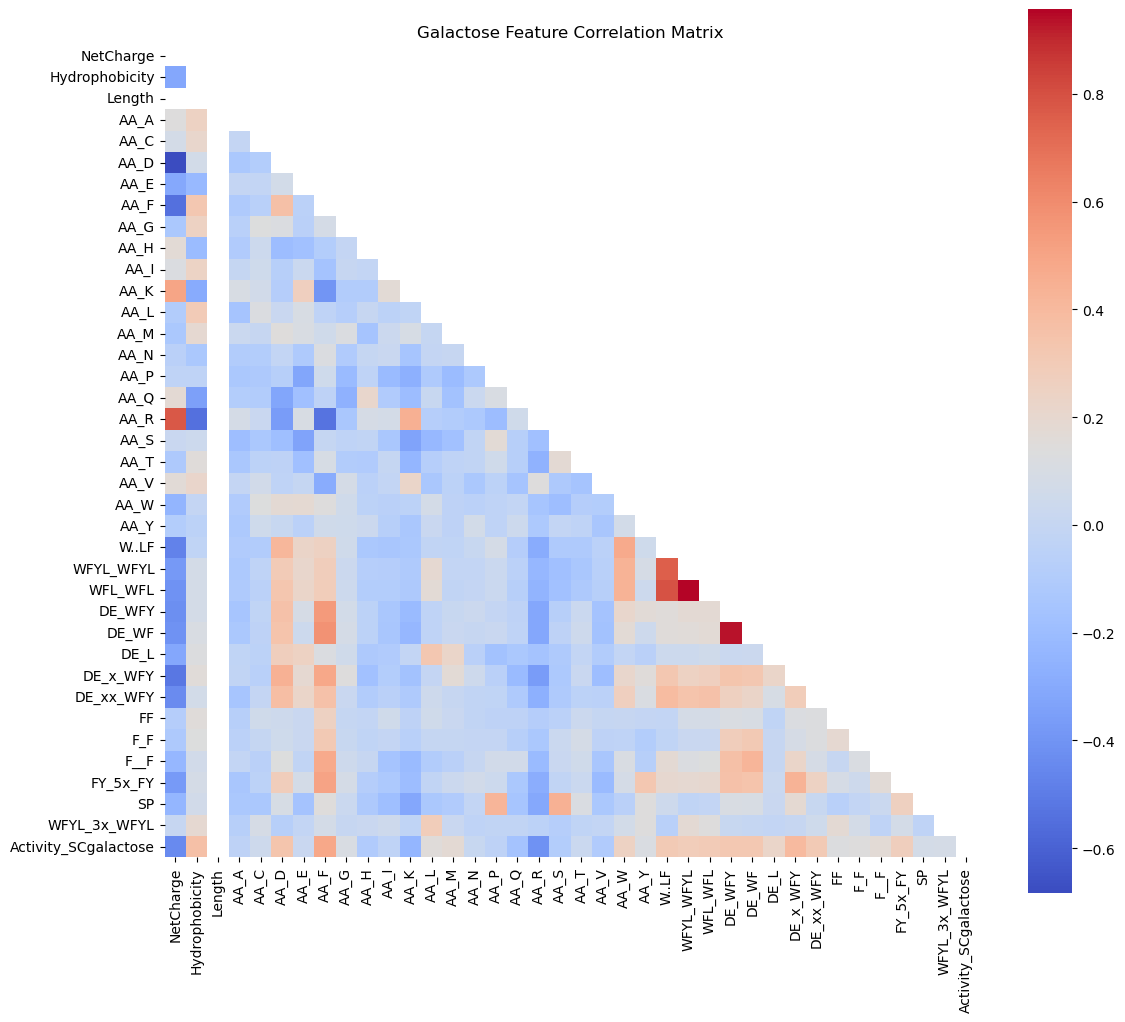

In [13]:

# Check correlation matrix
plt.figure(figsize=(12, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Galactose Feature Correlation Matrix")
plt.tight_layout()
#plt.savefig("GCN4_correlation_matrix.png")
plt.show()


In [14]:
# Get top 10 positive and negative correlations with the target variable
corr_target = df.corr()[activity_col_gal].sort_values(ascending=False)
top_10_positive = corr_target.head(10)
top_10_negative = corr_target.tail(10)
print("Top 10 positive correlations with target:")
print(top_10_positive)

print("="*50)

print("Top 10 negative correlations with target:")
print(top_10_negative)

Top 10 positive correlations with target:
Activity_SCgalactose    1.000000
AA_F                    0.483265
DE_x_WFY                0.398081
Hydrophobicity          0.363599
AA_D                    0.338413
DE_WFY                  0.320236
DE_WF                   0.318454
W..LF                   0.309696
DE_xx_WFY               0.307296
WFL_WFL                 0.297927
Name: Activity_SCgalactose, dtype: float64
Top 10 negative correlations with target:
AA_P        -0.036554
AA_A        -0.041080
AA_S        -0.089480
AA_V        -0.102987
AA_H        -0.106469
AA_Q        -0.160848
AA_K        -0.237128
AA_R        -0.408354
NetCharge   -0.445969
Length            NaN
Name: Activity_SCgalactose, dtype: float64


In [15]:
x_train_gal, x_test_gal, y_train_gal, y_test_gal = train_test_split(x_gal, y_gal, test_size=0.2, random_state=42)

In [16]:
linear_reg_gal = make_pipeline(StandardScaler(), LinearRegression())
linear_reg_gal.fit(x_train_gal, y_train_gal)
linear_reg_y_pred_gal = linear_reg_gal.predict(x_test_gal)

print("Linear Regression Results:")
print(f"R^2: {r2_score(y_test_gal, linear_reg_y_pred_gal):.4f}")
print(f"MAE: {mean_absolute_error(y_test_gal, linear_reg_y_pred_gal):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test_gal, linear_reg_y_pred_gal):.4f}")
print(f"Pearson Correlation: {pearsonr(y_test_gal, linear_reg_y_pred_gal)[0]:.4f}")

Linear Regression Results:
R^2: 0.3900
MAE: 32843.5195
RMSE: 42034.3811
Pearson Correlation: 0.6252


In [17]:
ridge_reg_gal = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_reg_gal.fit(x_train_gal, y_train_gal)
ridge_reg_y_pred_gal = ridge_reg_gal.predict(x_test_gal)
print("Ridge Regression Results for SCgalactose:")
print(f"R^2: {r2_score(y_test_gal, ridge_reg_y_pred_gal):.3f}")
print(f"MAE: {mean_absolute_error(y_test_gal, ridge_reg_y_pred_gal):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test_gal, ridge_reg_y_pred_gal):.3f}")
print(f"Pearson Correlation: {pearsonr(y_test_gal, ridge_reg_y_pred_gal)[0]:.3f}")

Ridge Regression Results for SCgalactose:
R^2: 0.390
MAE: 32844.087
RMSE: 42034.659
Pearson Correlation: 0.625


In [18]:
lasso_reg_gal = make_pipeline(StandardScaler(), Lasso(alpha=1.0, max_iter=100000))
lasso_reg_gal.fit(x_train_gal, y_train_gal)
lasso_reg_y_pred_gal = lasso_reg_gal.predict(x_test_gal)

print("Lasso Regression Results:")
print(f"R^2: {r2_score(y_test_gal, lasso_reg_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_test_gal, lasso_reg_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_test_gal, lasso_reg_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_test_gal, lasso_reg_y_pred_gal)[0]}")

Lasso Regression Results:
R^2: 0.39002079335234063
MAE: 32843.99240486016
RMSE: 42034.388873136224
Pearson Correlation: 0.6252302898619648


In [19]:
grad_boost_reg_gal = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
)
grad_boost_reg_gal.fit(x_train_gal, y_train_gal)
grad_boost_reg_y_pred_gal = grad_boost_reg_gal.predict(x_test_gal)
print("Gradient Boosting Regressor Results for SCgalactose:")
print(f"R^2: {r2_score(y_test_gal, grad_boost_reg_y_pred_gal):.3f}")
print(f"MAE: {mean_absolute_error(y_test_gal, grad_boost_reg_y_pred_gal):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test_gal, grad_boost_reg_y_pred_gal):.3f}")
print(f"Pearson Correlation: {pearsonr(y_test_gal, grad_boost_reg_y_pred_gal)[0]:.3f}")

Gradient Boosting Regressor Results for SCgalactose:
R^2: 0.408
MAE: 32322.851
RMSE: 41409.985
Pearson Correlation: 0.639


In [20]:
elastic_reg_gal = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=100000))
elastic_reg_gal.fit(x_train_gal, y_train_gal)
elastic_reg_y_pred_gal = elastic_reg_gal.predict(x_test_gal)

print("Elastic Net Regression Results:")
print(f"R^2: {r2_score(y_test_gal, elastic_reg_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_test_gal, elastic_reg_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_test_gal, elastic_reg_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_test_gal, elastic_reg_y_pred_gal)[0]}")

Elastic Net Regression Results:
R^2: 0.37084742609639665
MAE: 34093.24945767738
RMSE: 42689.9072424606
Pearson Correlation: 0.6131014048525667


In [21]:
random_forest_reg_gal = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, random_state=42)
)
random_forest_reg_gal.fit(x_train_gal, y_train_gal)
random_forest_y_pred_gal = random_forest_reg_gal.predict(x_test_gal)

print("Random Forest Regressor Results for SCgalactose:")
print(f"R^2: {r2_score(y_test_gal, random_forest_y_pred_gal):.3f}")
print(f"MAE: {mean_absolute_error(y_test_gal, random_forest_y_pred_gal):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test_gal, random_forest_y_pred_gal):.3f}")
print(f"Pearson Correlation: {pearsonr(y_test_gal, random_forest_y_pred_gal)[0]:.3f}")

Random Forest Regressor Results for SCgalactose:
R^2: 0.429
MAE: 31196.194
RMSE: 40673.917
Pearson Correlation: 0.655


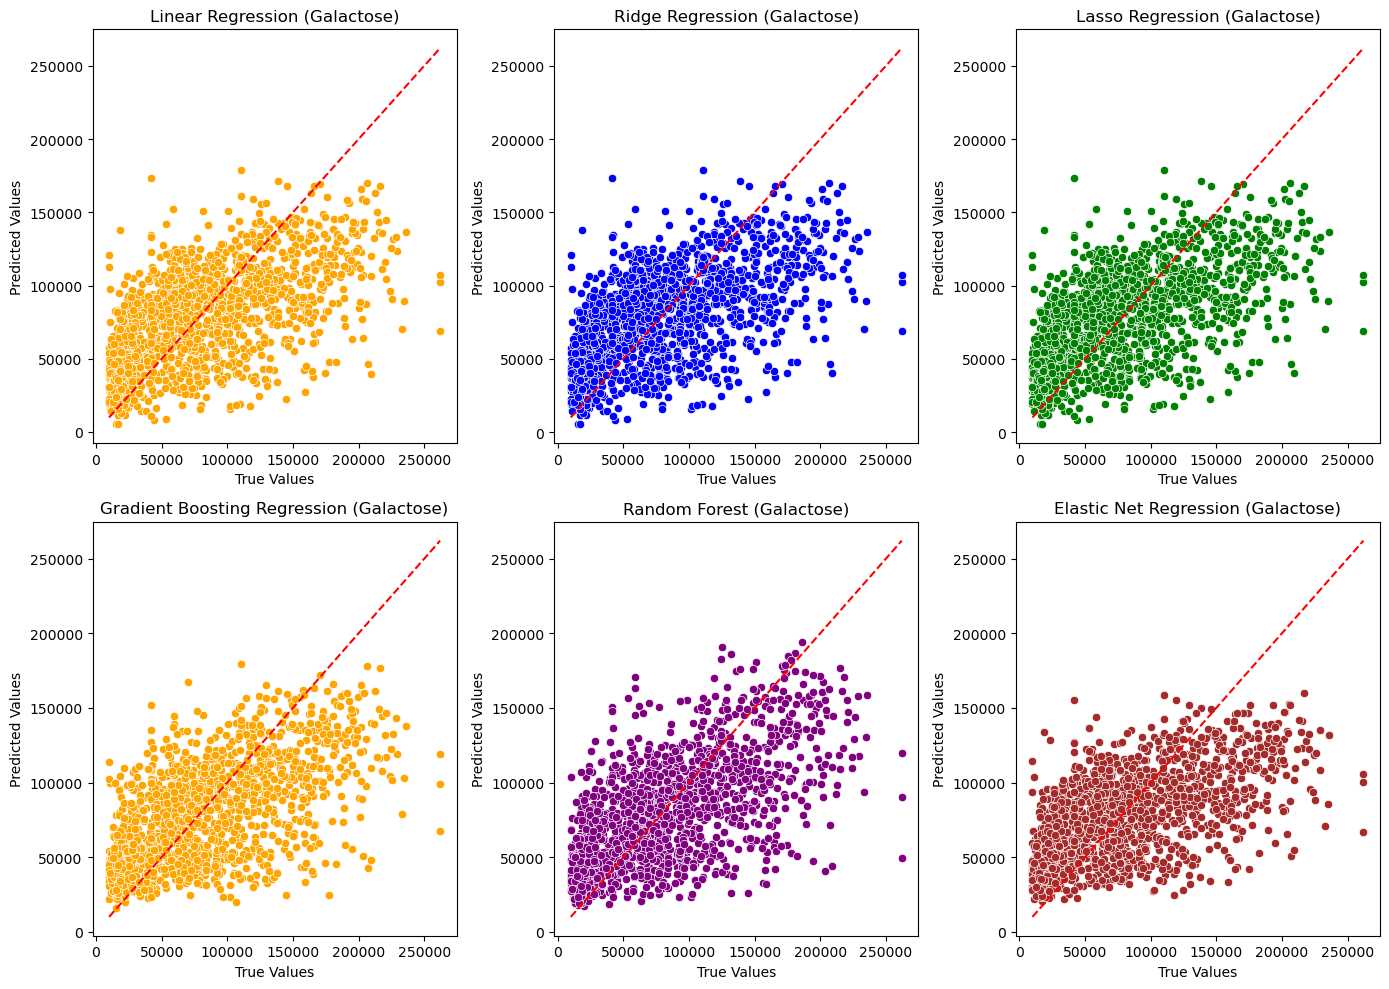

In [22]:
# Make subplots for each model on SCgalactose
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

# Ridge Regression
sns.scatterplot(x=y_test_gal, y=ridge_reg_y_pred_gal, ax=axes[1], color='blue')
axes[1].set_title("Ridge Regression (Galactose)")
axes[1].set_xlabel("True Values")
axes[1].set_ylabel("Predicted Values")
sns.lineplot(x=y_test_gal, y=y_test_gal, ax=axes[1], color='red', linestyle='--')

# Lasso Regression
sns.scatterplot(x=y_test_gal, y=lasso_reg_y_pred_gal , ax=axes[2], color='green')
axes[2].set_title("Lasso Regression (Galactose)")
axes[2].set_xlabel("True Values")
axes[2].set_ylabel("Predicted Values")
sns.lineplot(x=y_test_gal, y=y_test_gal, ax=axes[2], color='red', linestyle='--')

# Gradient 
sns.scatterplot(x=y_test_gal, y=grad_boost_reg_y_pred_gal, ax=axes[3], color='orange')
axes[3].set_title("Gradient Boosting Regression (Galactose)")
axes[3].set_xlabel("True Values")
axes[3].set_ylabel("Predicted Values")
sns.lineplot(x=y_test_gal, y=y_test_gal, ax=axes[3], color='red', linestyle='--')

# Linear Regression
sns.scatterplot(x=y_test_gal, y=linear_reg_y_pred_gal, ax=axes[0], color='orange')
axes[0].set_title("Linear Regression (Galactose)")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")
sns.lineplot(x=y_test_gal, y=y_test_gal, ax=axes[0], color='red', linestyle='--')

# Random Forest
sns.scatterplot(x=y_test_gal, y=random_forest_y_pred_gal, ax=axes[4], color='purple')
axes[4].set_title("Random Forest (Galactose)")
axes[4].set_xlabel("True Values")
axes[4].set_ylabel("Predicted Values")
sns.lineplot(x=y_test_gal, y=y_test_gal, ax=axes[4], color='red', linestyle='--')

# Elastic Net Regression
sns.scatterplot(x=y_test_gal, y=elastic_reg_y_pred_gal, ax=axes[5], color='brown')
axes[5].set_title("Elastic Net Regression (Galactose)")
axes[5].set_xlabel("True Values")
axes[5].set_ylabel("Predicted Values")
sns.lineplot(x=y_test_gal, y=y_test_gal, ax=axes[5], color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [23]:
# Make df of results
results = {
    "Model": ["Linear (for Galactose)", "Ridge (for Galactose)", "Lasso (for Galactose)", "Gradient Boosting (for Galactose)", "Random Forest (for Galactose)", "Elastic Net (for Galactose)"],
    "R^2": [
        r2_score(y_test_gal, linear_reg_y_pred_gal),
        r2_score(y_test_gal, ridge_reg_y_pred_gal),
        r2_score(y_test_gal, lasso_reg_y_pred_gal),
        r2_score(y_test_gal, grad_boost_reg_y_pred_gal),
        r2_score(y_test_gal, random_forest_y_pred_gal),
        r2_score(y_test_gal, elastic_reg_y_pred_gal)
    ],
    "MAE": [
        mean_absolute_error(y_test_gal, linear_reg_y_pred_gal),
        mean_absolute_error(y_test_gal, ridge_reg_y_pred_gal),
        mean_absolute_error(y_test_gal, lasso_reg_y_pred_gal),
        mean_absolute_error(y_test_gal, grad_boost_reg_y_pred_gal),
        mean_absolute_error(y_test_gal, random_forest_y_pred_gal),
        mean_absolute_error(y_test_gal, elastic_reg_y_pred_gal)
    ],
    "RMSE": [
        root_mean_squared_error(y_test_gal, linear_reg_y_pred_gal),
        root_mean_squared_error(y_test_gal, ridge_reg_y_pred_gal),
        root_mean_squared_error(y_test_gal, lasso_reg_y_pred_gal),
        root_mean_squared_error(y_test_gal, grad_boost_reg_y_pred_gal),
        root_mean_squared_error(y_test_gal, random_forest_y_pred_gal),
        root_mean_squared_error(y_test_gal, elastic_reg_y_pred_gal)
    ],
    "Pearson Correlation": [
        pearsonr(y_test_gal, linear_reg_y_pred_gal)[0],
        pearsonr(y_test_gal, ridge_reg_y_pred_gal)[0],
        pearsonr(y_test_gal, lasso_reg_y_pred_gal)[0],
        pearsonr(y_test_gal, grad_boost_reg_y_pred_gal)[0],
        pearsonr(y_test_gal, random_forest_y_pred_gal)[0],
        pearsonr(y_test_gal, elastic_reg_y_pred_gal)[0]
    ]
}
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R^2", ascending=False).reset_index(drop=True)   
results_df.head(6)

,Model,R^2,MAE,RMSE,Pearson Correlation
0,Random Forest (for Galactose),0.428867,31196.193562,40673.917323,0.655263
1,Gradient Boosting (for Galactose),0.408008,32322.850579,41409.985053,0.639404
2,Linear (for Galactose),0.390021,32843.519523,42034.381059,0.625230
3,Lasso (for Galactose),0.390021,32843.992405,42034.388873,0.625230
4,Ridge (for Galactose),0.390013,32844.087143,42034.659486,0.625224
5,Elastic Net (for Galactose),0.370847,34093.249458,42689.907242,0.613101


In [24]:
import os

# Create the directory if it doesn't exist
os.makedirs("./models", exist_ok=True)

# Save the model
joblib.dump(random_forest_reg_gal, "./models/random_forest_gal_model.pkl")

['./models/random_forest_gal_model.pkl']

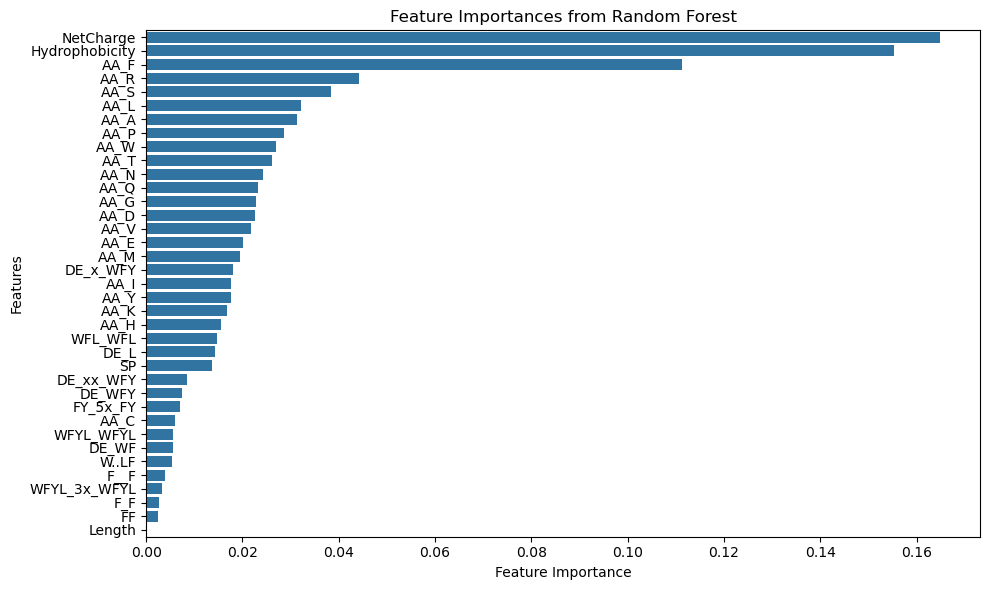

In [25]:

feature_importances = random_forest_reg_gal.named_steps['randomforestregressor'].feature_importances_
feature_names = x_gal.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
#plt.savefig("GCN4_feature_importances.png")
plt.show()

In [26]:
# Load the .env file
load_dotenv()
hf_token = os.getenv("HF_TOKEN")

# Load model and tokenizer once
model_id = "facebook/esm2_t6_8M_UR50D"
tokenizer = AutoTokenizer.from_pretrained(model_id, token=hf_token)
model = AutoModel.from_pretrained(model_id, token=hf_token)
model.eval()

def generate_embedding(sequence):
    """Generate pooled ESM embedding for a protein sequence."""
    input_ids = tokenizer(sequence, return_tensors="pt").input_ids
    attention_mask = torch.ones_like(input_ids)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        sequence_embeddings = outputs.last_hidden_state.squeeze()

    # Remove special tokens [CLS], [EOS]
    sequence_embeddings = sequence_embeddings[1:-1]

    # Mean-pool across residues
    pooled_embedding = sequence_embeddings.mean(dim=0)  # shape: (hidden_size,)
    return pooled_embedding.cpu().numpy()

def save_embeddings_to_npz(data, sequence_column, save_path):
    """Generate embeddings for all sequences and save into a single NPZ file."""
    all_embeddings = []

    for sequence in tqdm(data[sequence_column], desc="Generating embeddings"):
        embedding = generate_embedding(sequence)
        all_embeddings.append(embedding)

    all_embeddings = np.stack(all_embeddings)  # Shape: (num_sequences, hidden_dim)

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save the embeddings
    np.savez_compressed(save_path, embeddings=all_embeddings)
    print(f"Saved {len(all_embeddings)} embeddings to {save_path}")

# Comment out when not needed
save_embeddings_to_npz(df_with_seq_gal, sequence_column="ADseq", save_path="./galactose_esm2_embeddings.npz")

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating embeddings: 100%|██████████| 8360/8360 [02:08<00:00, 65.22it/s]


Saved 8360 embeddings to ./galactose_esm2_embeddings.npz


In [27]:
# Load the embeddings from the NPZ file
embeddings_data = np.load("./galactose_esm2_embeddings.npz")
embeddings_gal = embeddings_data["embeddings"]

# Check the shape of the loaded embeddings
print(f"Loaded embeddings shape: {embeddings_gal.shape}")

Loaded embeddings shape: (8360, 320)


In [28]:
# Prep embededings into a dataframe for feature concatenation
embeddings_df_gal = pd.DataFrame(embeddings_gal)
embeddings_df_gal.columns = [f"embedding_{i}" for i in range(embeddings_df_gal.shape[1])]
embeddings_df_gal.head(3)

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_310,embedding_311,embedding_312,embedding_313,embedding_314,embedding_315,embedding_316,embedding_317,embedding_318,embedding_319
0,-0.025192,-0.386163,0.038171,0.142584,0.045324,-0.185973,-0.089887,0.023278,-0.155760,-0.039424,...,0.242718,-0.096438,0.113960,0.213151,-0.079959,0.146884,-0.072922,0.234120,-0.032808,0.050551
1,0.014334,-0.416917,0.232792,0.121774,-0.028585,-0.204531,-0.152476,0.021117,-0.132263,-0.106221,...,0.087891,-0.152725,0.103766,0.121723,-0.077505,0.077168,-0.150012,0.081626,0.134874,0.011173
2,-0.005063,-0.397236,-0.005174,0.114196,0.172707,-0.098770,-0.020182,0.004256,-0.168792,-0.136290,...,0.192599,-0.115246,0.148075,0.255852,-0.075508,0.183581,-0.043454,0.221282,0.090849,0.028793


In [29]:
# the assert below is for me to chek for dimension mismatch
assert embeddings_df_gal.shape[0] == df_gal.shape[0], "Mismatch in number of rows between embeddings and original DataFrame"

# Concatenate the embeddings with the original DataFrame
x_esm_gal = pd.concat([x_gal.reset_index(drop=True),
                   embeddings_df_gal.reset_index(drop=True)],
                  axis=1)
y_esm_gal = y_gal.copy()

print(f"X_esm shape: {x_esm_gal.shape}")
print(f"y_esm shape: {y_esm_gal.shape}")

X_esm shape: (8360, 357)
y_esm shape: (8360,)


In [30]:
x_esm_train_gal, x_esm_test_gal, y_esm_train_gal, y_esm_test_gal = train_test_split(x_esm_gal, y_esm_gal, test_size=0.2, random_state=42)

In [31]:
esm_linear_reg_gal = make_pipeline(StandardScaler(), LinearRegression())
esm_linear_reg_gal.fit(x_esm_train_gal, y_esm_train_gal)
esm_linear_reg_y_pred_gal = esm_linear_reg_gal.predict(x_esm_test_gal)

print("Linear Regression with ESM Embeddings Results:")
print(f"R^2: {r2_score(y_esm_test_gal, esm_linear_reg_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_esm_test_gal, esm_linear_reg_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_esm_test_gal, esm_linear_reg_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_esm_test_gal, esm_linear_reg_y_pred_gal)[0]}")

Linear Regression with ESM Embeddings Results:
R^2: 0.23537451368139295
MAE: 35825.27268704991
RMSE: 47062.133037609936
Pearson Correlation: 0.5585328051488605


In [32]:
esm_ridge_reg_gal = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
esm_ridge_reg_gal.fit(x_esm_train_gal, y_esm_train_gal)
esm_ridge_reg_y_pred_gal = esm_ridge_reg_gal.predict(x_esm_test_gal)

# Just print for now
print("Ridge Regression Results (Galactose):")
print(f"R^2: {r2_score(y_esm_test_gal, esm_ridge_reg_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_esm_test_gal, esm_ridge_reg_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_esm_test_gal, esm_ridge_reg_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_esm_test_gal, esm_ridge_reg_y_pred_gal)[0]}")

Ridge Regression Results (Galactose):
R^2: 0.4182259224695186
MAE: 31288.16019395661
RMSE: 41051.06280700234
Pearson Correlation: 0.6510301009021788


In [33]:
# Lasso Regression
esm_lasso_reg_gal = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
esm_lasso_reg_gal.fit(x_esm_train_gal, y_esm_train_gal)
esm_lasso_reg_y_pred_gal = esm_lasso_reg_gal.predict(x_esm_test_gal)

print("Lasso Regression Results (Galactose):")
print(f"R^2: {r2_score(y_esm_test_gal, esm_lasso_reg_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_esm_test_gal, esm_lasso_reg_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_esm_test_gal, esm_lasso_reg_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_esm_test_gal, esm_lasso_reg_y_pred_gal)[0]}")

Lasso Regression Results (Galactose):
R^2: 0.41798476734924805
MAE: 31299.851558059727
RMSE: 41059.57010277924
Pearson Correlation: 0.6509565711131717


/srv/conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.921e+12, tolerance: 2.000e+09
  model = cd_fast.enet_coordinate_descent(


In [34]:
# Gradient Boosting Regression
esm_grad_boost_reg_gal = GradientBoostingRegressor(n_estimators=100, random_state=42)
esm_grad_boost_reg_gal.fit(x_esm_train_gal, y_esm_train_gal)
esm_grad_boost_reg_y_pred_gal = esm_grad_boost_reg_gal.predict(x_esm_test_gal)

print("Gradient Boosting Regression Results (Galactose):")
print(f"R^2: {r2_score(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal)[0]}")

Gradient Boosting Regression Results (Galactose):
R^2: 0.41992196613836785
MAE: 31707.275120974387
RMSE: 40991.181131368074
Pearson Correlation: 0.6487077764125251


In [35]:
esm_elastic_reg_gal = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=100000))
esm_elastic_reg_gal.fit(x_esm_train_gal, y_esm_train_gal)
esm_elastic_reg_y_pred_gal = esm_elastic_reg_gal.predict(x_esm_test_gal)

print("Elastic Net Regression Results:")
print(f"R^2: {r2_score(y_esm_test_gal, esm_elastic_reg_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_esm_test_gal, esm_elastic_reg_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_esm_test_gal, esm_elastic_reg_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_esm_test_gal, esm_elastic_reg_y_pred_gal)[0]}")

Elastic Net Regression Results:
R^2: 0.4071577718770595
MAE: 32442.134869951667
RMSE: 41439.71765695648
Pearson Correlation: 0.639422269775672


In [36]:
# Random Forest Regression
esm_random_forest_reg_gal = RandomForestRegressor(n_estimators=100, random_state=42)
esm_random_forest_reg_gal.fit(x_esm_train_gal, y_esm_train_gal)
esm_random_forest_y_pred_gal = esm_random_forest_reg_gal.predict(x_esm_test_gal)

print("Random Forest Regression Results (Galactose):")
print(f"R^2: {r2_score(y_esm_test_gal, esm_random_forest_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_esm_test_gal, esm_random_forest_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_esm_test_gal, esm_random_forest_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_esm_test_gal, esm_random_forest_y_pred_gal)[0]}")

Random Forest Regression Results (Galactose):
R^2: 0.4331951856584767
MAE: 31497.89122649578
RMSE: 40519.491592854116
Pearson Correlation: 0.6593070432146668


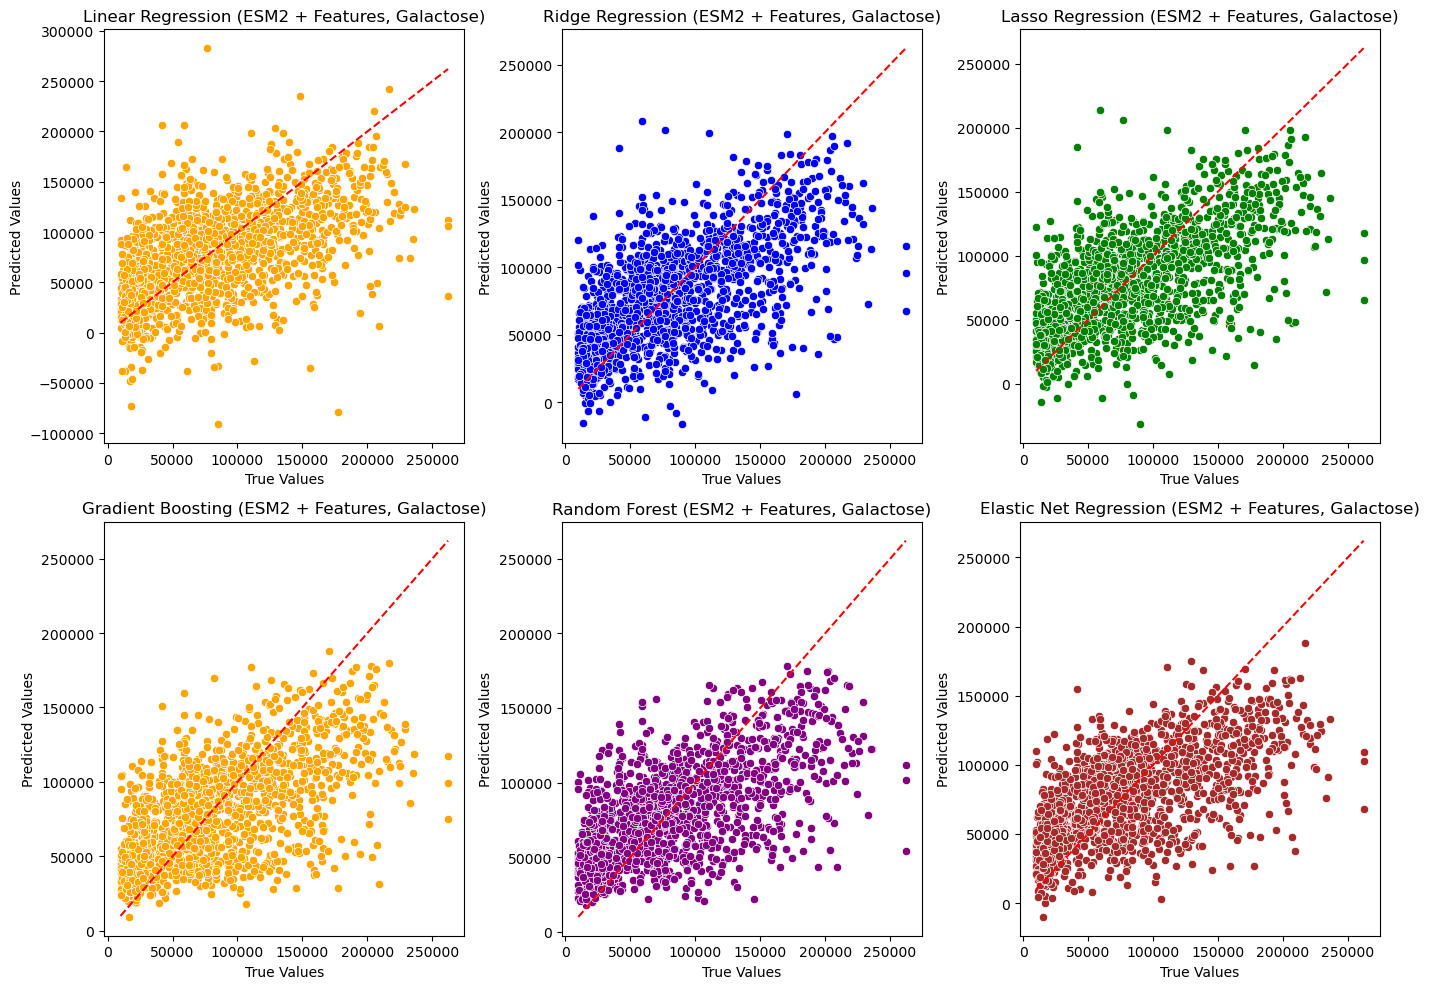

In [37]:
# Make subplots for each model (Galactose)
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

# Linear Regression
sns.scatterplot(x=y_esm_test_gal, y=esm_linear_reg_y_pred_gal, ax=axes[0], color='orange')
axes[0].set_title("Linear Regression (ESM2 + Features, Galactose)")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")
sns.lineplot(x=y_esm_test_gal, y=y_esm_test_gal, ax=axes[0], color='red', linestyle='--')

# Ridge Regression
sns.scatterplot(x=y_esm_test_gal, y=esm_ridge_reg_y_pred_gal, ax=axes[1], color='blue')
axes[1].set_title("Ridge Regression (ESM2 + Features, Galactose)")
axes[1].set_xlabel("True Values")
axes[1].set_ylabel("Predicted Values")
sns.lineplot(x=y_esm_test_gal, y=y_esm_test_gal, ax=axes[1], color='red', linestyle='--')

# Lasso Regression
sns.scatterplot(x=y_esm_test_gal, y=esm_lasso_reg_y_pred_gal, ax=axes[2], color='green')
axes[2].set_title("Lasso Regression (ESM2 + Features, Galactose)")
axes[2].set_xlabel("True Values")
axes[2].set_ylabel("Predicted Values")
sns.lineplot(x=y_esm_test_gal, y=y_esm_test_gal, ax=axes[2], color='red', linestyle='--')

# Gradient Boosting Regression
sns.scatterplot(x=y_esm_test_gal, y=esm_grad_boost_reg_y_pred_gal, ax=axes[3], color='orange')
axes[3].set_title("Gradient Boosting (ESM2 + Features, Galactose)")
axes[3].set_xlabel("True Values")
axes[3].set_ylabel("Predicted Values")
sns.lineplot(x=y_esm_test_gal, y=y_esm_test_gal, ax=axes[3], color='red', linestyle='--')

# Random Forest Regression
sns.scatterplot(x=y_esm_test_gal, y=esm_random_forest_y_pred_gal, ax=axes[4], color='purple')
axes[4].set_title("Random Forest (ESM2 + Features, Galactose)")
axes[4].set_xlabel("True Values")
axes[4].set_ylabel("Predicted Values")
sns.lineplot(x=y_esm_test_gal, y=y_esm_test_gal, ax=axes[4], color='red', linestyle='--')

# Elastic Net Regression
sns.scatterplot(x=y_esm_test_gal, y=esm_elastic_reg_y_pred_gal, ax=axes[5], color='brown')
axes[5].set_title("Elastic Net Regression (ESM2 + Features, Galactose)")
axes[5].set_xlabel("True Values")
axes[5].set_ylabel("Predicted Values")
sns.lineplot(x=y_esm_test_gal, y=y_esm_test_gal, ax=axes[5], color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [38]:
# Make df of results for Galactose
esm_results_gal = {
    "Model": ["Linear (ESM for Galactose)", "Ridge (ESM for Galactose)", "Lasso (ESM for Galactose)", "Gradient Boosting (ESM for Galactose)", "Random Forest (ESM for Galactose)", "Elastic Net (ESM for Galactose)"],
    "R^2": [
        r2_score(y_esm_test_gal, esm_linear_reg_y_pred_gal),
        r2_score(y_esm_test_gal, esm_ridge_reg_y_pred_gal),
        r2_score(y_esm_test_gal, esm_lasso_reg_y_pred_gal),
        r2_score(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal),
        r2_score(y_esm_test_gal, esm_random_forest_y_pred_gal),
        r2_score(y_esm_test_gal, esm_elastic_reg_y_pred_gal)
    ],
    "MAE": [
        mean_absolute_error(y_esm_test_gal, esm_linear_reg_y_pred_gal),
        mean_absolute_error(y_esm_test_gal, esm_ridge_reg_y_pred_gal),
        mean_absolute_error(y_esm_test_gal, esm_lasso_reg_y_pred_gal),
        mean_absolute_error(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal),
        mean_absolute_error(y_esm_test_gal, esm_random_forest_y_pred_gal),
        mean_absolute_error(y_esm_test_gal, esm_elastic_reg_y_pred_gal)
    ],
    "RMSE": [
        root_mean_squared_error(y_esm_test_gal, esm_linear_reg_y_pred_gal),
        root_mean_squared_error(y_esm_test_gal, esm_ridge_reg_y_pred_gal),
        root_mean_squared_error(y_esm_test_gal, esm_lasso_reg_y_pred_gal),
        root_mean_squared_error(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal),
        root_mean_squared_error(y_esm_test_gal, esm_random_forest_y_pred_gal),
        root_mean_squared_error(y_esm_test_gal, esm_elastic_reg_y_pred_gal)
    ],
    "Pearson Correlation": [
        pearsonr(y_esm_test_gal, esm_linear_reg_y_pred_gal)[0],
        pearsonr(y_esm_test_gal, esm_ridge_reg_y_pred_gal)[0],
        pearsonr(y_esm_test_gal, esm_lasso_reg_y_pred_gal)[0],
        pearsonr(y_esm_test_gal, esm_grad_boost_reg_y_pred_gal)[0],
        pearsonr(y_esm_test_gal, esm_random_forest_y_pred_gal)[0],
        pearsonr(y_esm_test_gal, esm_elastic_reg_y_pred_gal)[0]
    ]
}
esm_results_df_gal = pd.DataFrame(esm_results_gal)
esm_results_df_gal = esm_results_df_gal.sort_values(by="R^2", ascending=False).reset_index(drop=True)
esm_results_df_gal.head(6)

,Model,R^2,MAE,RMSE,Pearson Correlation
0,Random Forest (ESM for Galactose),0.433195,31497.891226,40519.491593,0.659307
1,Gradient Boosting (ESM for Galactose),0.419922,31707.275121,40991.181131,0.648708
2,Ridge (ESM for Galactose),0.418226,31288.160194,41051.062807,0.651030
3,Lasso (ESM for Galactose),0.417985,31299.851558,41059.570103,0.650957
4,Elastic Net (ESM for Galactose),0.407158,32442.134870,41439.717657,0.639422
5,Linear (ESM for Galactose),0.235375,35825.272687,47062.133038,0.558533


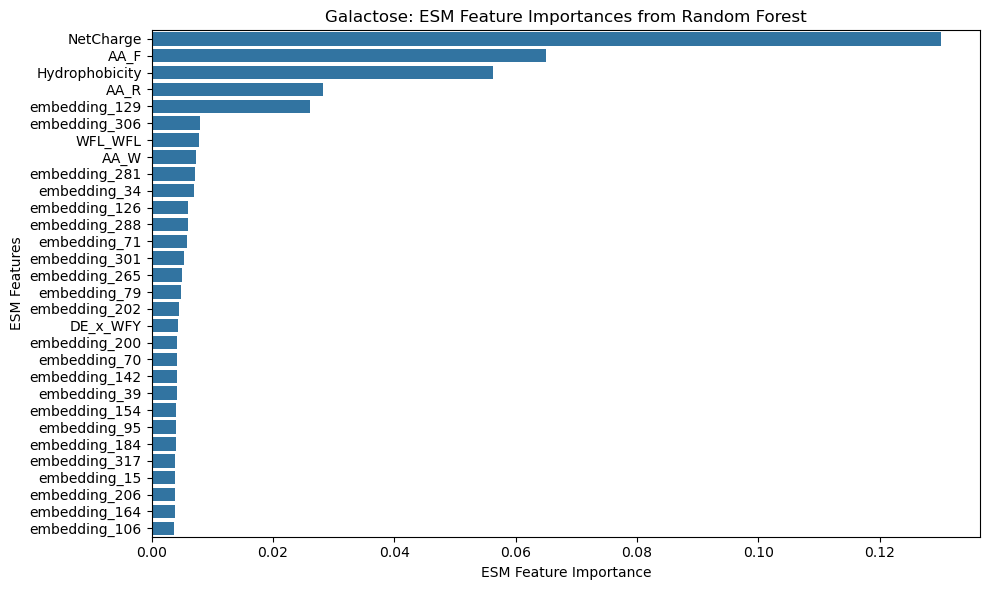

In [39]:
# Get feature importances from galactose Random Forest model
esm_feature_importances_gal = esm_random_forest_reg_gal.feature_importances_
esm_feature_names_gal = x_esm_gal.columns
esm_sorted_indices_gal = np.argsort(esm_feature_importances_gal)[::-1]

top_k = 30

sorted_esm_feature_importances_gal = esm_feature_importances_gal[esm_sorted_indices_gal][:top_k]
sorted_esm_feature_names_gal = esm_feature_names_gal[esm_sorted_indices_gal][:top_k]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_esm_feature_importances_gal, y=sorted_esm_feature_names_gal)
plt.xlabel("ESM Feature Importance")
plt.ylabel("ESM Features")
plt.title("Galactose: ESM Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

In [40]:
import joblib
joblib.dump(esm_random_forest_reg_gal, "./models/esm_random_forest_model_gal.pkl")

['./models/esm_random_forest_model_gal.pkl']

In [41]:
x_only_embeddings_gal = embeddings_df_gal.copy()
y_only_embeddings_gal = y_gal.copy()

In [42]:
x_only_embeddings_train_gal, x_only_embeddings_test_gal, y_only_embeddings_train_gal, y_only_embeddings_test_gal = train_test_split(
    x_only_embeddings_gal, y_only_embeddings_gal, test_size=0.2, random_state=42)

In [43]:
# Linear Regression
linear_reg_embeddings_gal = make_pipeline(StandardScaler(), LinearRegression())
linear_reg_embeddings_gal.fit(x_only_embeddings_train_gal, y_only_embeddings_train_gal)
linear_reg_embeddings_y_pred_gal = linear_reg_embeddings_gal.predict(x_only_embeddings_test_gal)
print("Linear Regression with ESM Embeddings Results:")
print(f"R^2: {r2_score(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal)[0]}")

Linear Regression with ESM Embeddings Results:
R^2: 0.4110527533062649
MAE: 31659.84178433523
RMSE: 41303.36357407488
Pearson Correlation: 0.6459323314193213


In [44]:
# Ridge Regression for Galactose
ridge_reg_embeddings_gal = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_reg_embeddings_gal.fit(x_only_embeddings_train_gal, y_only_embeddings_train_gal)
ridge_reg_embeddings_gal_y_pred = ridge_reg_embeddings_gal.predict(x_only_embeddings_test_gal)

print("Ridge Regression Results (Only ESM2 for Galactose):")
print(f"R^2: {r2_score(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred)}")
print(f"MAE: {mean_absolute_error(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred)}")
print(f"Pearson Correlation: {pearsonr(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred)[0]}")

Ridge Regression Results (Only ESM2 for Galactose):
R^2: 0.4118090362051533
MAE: 31641.686909614087
RMSE: 41276.835678552525
Pearson Correlation: 0.6463498541257227


In [45]:
# Lasso Regression for Galactose
lasso_reg_embeddings_gal = make_pipeline(StandardScaler(), Lasso(alpha=1.0, max_iter=100000))
lasso_reg_embeddings_gal.fit(x_only_embeddings_train_gal, y_only_embeddings_train_gal)
lasso_reg_embeddings_gal_y_pred = lasso_reg_embeddings_gal.predict(x_only_embeddings_test_gal)

print("Lasso Regression Results (Only ESM2 for Galactose):")
print(f"R^2: {r2_score(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred)}")
print(f"MAE: {mean_absolute_error(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred)}")
print(f"Pearson Correlation: {pearsonr(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred)[0]}")

Lasso Regression Results (Only ESM2 for Galactose):
R^2: 0.4116212790431727
MAE: 31646.29983044094
RMSE: 41283.4231676715
Pearson Correlation: 0.6462505196322523


In [46]:
# Gradient Boosting for Galactose
grad_boost_reg_embeddings_gal = make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
grad_boost_reg_embeddings_gal.fit(x_only_embeddings_train_gal, y_only_embeddings_train_gal)
grad_boost_reg_embeddings_gal_y_pred = grad_boost_reg_embeddings_gal.predict(x_only_embeddings_test_gal)

print("Gradient Boosting Regressor Results (Only ESM2 for Galactose):")
print(f"R^2: {r2_score(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred)}")
print(f"MAE: {mean_absolute_error(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred)}")
print(f"Pearson Correlation: {pearsonr(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred)[0]}")

Gradient Boosting Regressor Results (Only ESM2 for Galactose):
R^2: 0.40962520299281513
MAE: 32104.871240031105
RMSE: 41353.39092650614
Pearson Correlation: 0.6409018746424546


In [47]:
# Random Forest Regression for Galactose
random_forest_reg_embeddings_gal = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
random_forest_reg_embeddings_gal.fit(x_only_embeddings_train_gal, y_only_embeddings_train_gal)
random_forest_reg_embeddings_gal_y_pred = random_forest_reg_embeddings_gal.predict(x_only_embeddings_test_gal)

print("Random Forest Regressor Results (Only ESM2 for Galactose):")
print(f"R^2: {r2_score(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred)}")
print(f"MAE: {mean_absolute_error(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred)}")
print(f"Pearson Correlation: {pearsonr(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred)[0]}")


Random Forest Regressor Results (Only ESM2 for Galactose):
R^2: 0.427561054925541
MAE: 31798.413163874648
RMSE: 40720.3787362394
Pearson Correlation: 0.655734429092366


In [48]:
# Elastic Net
elastic_reg_embeddings_gal = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=100000))
elastic_reg_embeddings_gal.fit(x_only_embeddings_train_gal, y_only_embeddings_train_gal)
elastic_reg_embeddings_y_pred_gal = elastic_reg_embeddings_gal.predict(x_only_embeddings_test_gal)
print("Elastic Net Regression Results (Only ESM2):")
print(f"R^2: {r2_score(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)}")
print(f"MAE: {mean_absolute_error(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)}")
print(f"RMSE: {root_mean_squared_error(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)}")
print(f"Pearson Correlation: {pearsonr(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)[0]}")

Elastic Net Regression Results (Only ESM2):
R^2: 0.39564814338396925
MAE: 32797.08958380816
RMSE: 41840.04593336029
Pearson Correlation: 0.6306033096953435


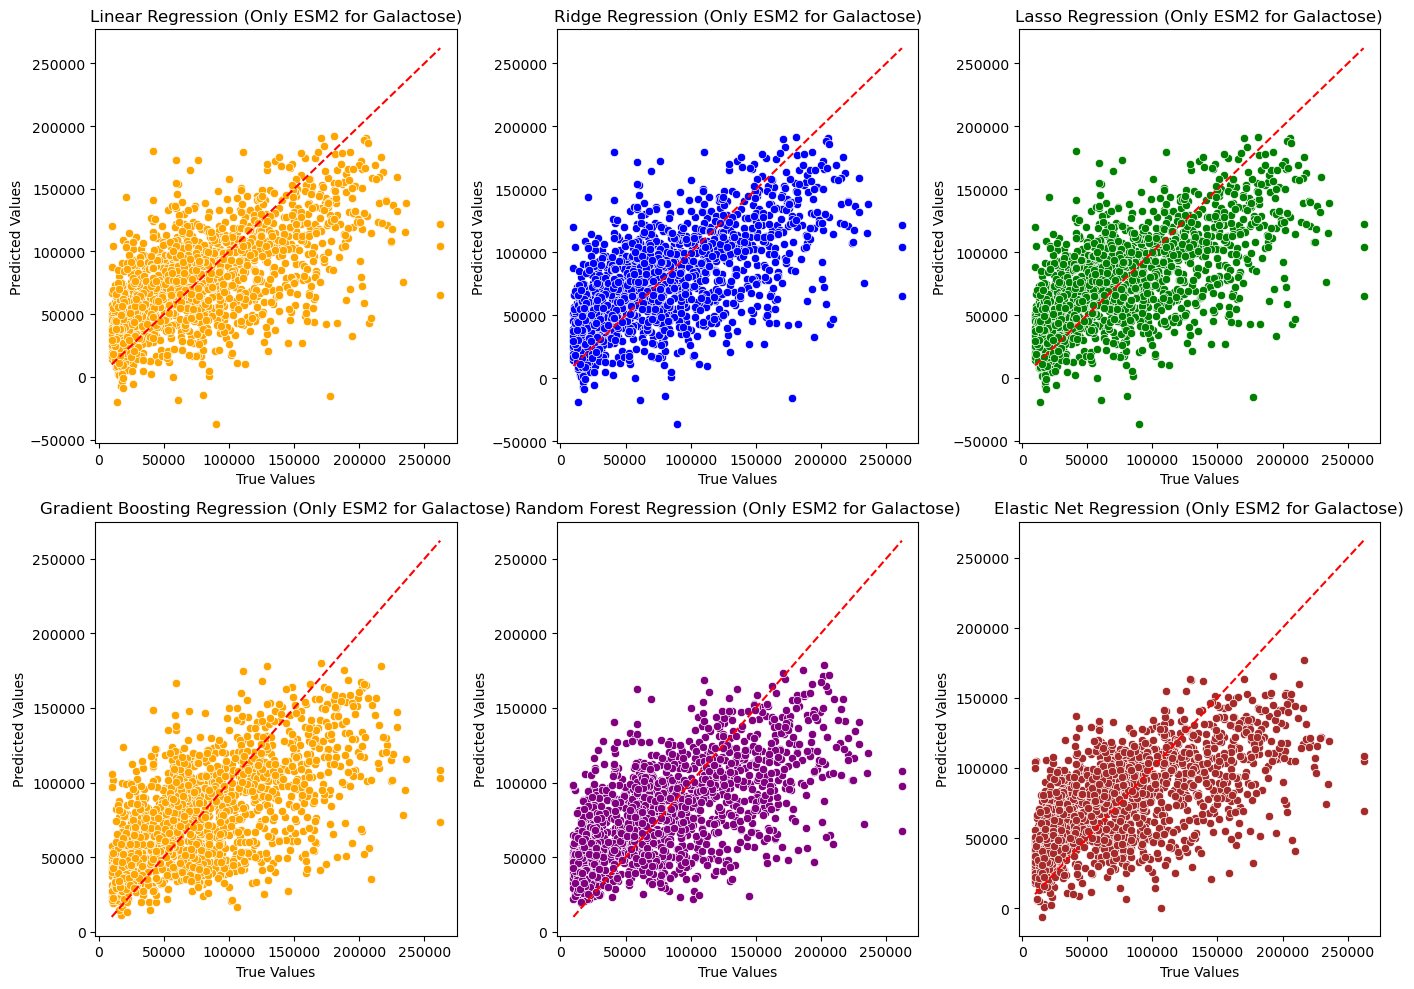

In [49]:
# subplots for Galactose
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

# Linear Regression
sns.scatterplot(x=y_only_embeddings_test_gal, y=linear_reg_embeddings_y_pred_gal, ax=axes[0], color='orange')
axes[0].set_title("Linear Regression (Only ESM2 for Galactose)")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")
sns.lineplot(x=y_only_embeddings_test_gal, y=y_only_embeddings_test_gal, ax=axes[0], color='red', linestyle='--')

# Ridge Regression (Galactose)
sns.scatterplot(x=y_only_embeddings_test_gal, y=ridge_reg_embeddings_gal_y_pred, ax=axes[1], color='blue')
axes[1].set_title("Ridge Regression (Only ESM2 for Galactose)")
axes[1].set_xlabel("True Values")
axes[1].set_ylabel("Predicted Values")
sns.lineplot(x=y_only_embeddings_test_gal, y=y_only_embeddings_test_gal, ax=axes[1], color='red', linestyle='--')

# Lasso Regression (Galactose)
sns.scatterplot(x=y_only_embeddings_test_gal, y=lasso_reg_embeddings_gal_y_pred, ax=axes[2], color='green')
axes[2].set_title("Lasso Regression (Only ESM2 for Galactose)")
axes[2].set_xlabel("True Values")
axes[2].set_ylabel("Predicted Values")
sns.lineplot(x=y_only_embeddings_test_gal, y=y_only_embeddings_test_gal, ax=axes[2], color='red', linestyle='--')

# Gradient Boosting Regression (Galactose)
sns.scatterplot(x=y_only_embeddings_test_gal, y=grad_boost_reg_embeddings_gal_y_pred, ax=axes[3], color='orange')
axes[3].set_title("Gradient Boosting Regression (Only ESM2 for Galactose)")
axes[3].set_xlabel("True Values")
axes[3].set_ylabel("Predicted Values")
sns.lineplot(x=y_only_embeddings_test_gal, y=y_only_embeddings_test_gal, ax=axes[3], color='red', linestyle='--')

# Random Forest Regression (Galactose)
sns.scatterplot(x=y_only_embeddings_test_gal, y=random_forest_reg_embeddings_gal_y_pred, ax=axes[4], color='purple')
axes[4].set_title("Random Forest Regression (Only ESM2 for Galactose)")
axes[4].set_xlabel("True Values")
axes[4].set_ylabel("Predicted Values")
sns.lineplot(x=y_only_embeddings_test_gal, y=y_only_embeddings_test_gal, ax=axes[4], color='red', linestyle='--')

# Elastic Net Regression
sns.scatterplot(x=y_only_embeddings_test_gal, y=elastic_reg_embeddings_y_pred_gal, ax=axes[5], color='brown')
axes[5].set_title("Elastic Net Regression (Only ESM2 for Galactose)")
axes[5].set_xlabel("True Values")
axes[5].set_ylabel("Predicted Values")
sns.lineplot(x=y_only_embeddings_test_gal, y=y_only_embeddings_test_gal, ax=axes[5], color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [50]:
# Make results df for Galactose
only_embeddings_results_gal = {
    "Model": ["Linear (Only ESM2 for Galactose)", "Ridge (Only ESM2 for Galactose)", "Lasso (Only ESM2 for Galactose)", "Gradient Boosting (Only ESM2 for Galactose)", "Random Forest (Only ESM2 for Galactose)", "Elastic Net (Only ESM2 for Galactose)"],
    "R^2": [
        r2_score(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal),
        r2_score(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred),
        r2_score(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred),
        r2_score(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred),
        r2_score(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred),
        r2_score(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)
    ],
    "MAE": [
        mean_absolute_error(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal),
        mean_absolute_error(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred),
        mean_absolute_error(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred),
        mean_absolute_error(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred),
        mean_absolute_error(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred),
        mean_absolute_error(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)
    ],
    "RMSE": [
        root_mean_squared_error(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal),
        root_mean_squared_error(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred),
        root_mean_squared_error(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred),
        root_mean_squared_error(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred),
        root_mean_squared_error(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred),
        root_mean_squared_error(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)
    ],
    "Pearson Correlation": [
        pearsonr(y_only_embeddings_test_gal, linear_reg_embeddings_y_pred_gal)[0],
        pearsonr(y_only_embeddings_test_gal, ridge_reg_embeddings_gal_y_pred)[0],
        pearsonr(y_only_embeddings_test_gal, lasso_reg_embeddings_gal_y_pred)[0],
        pearsonr(y_only_embeddings_test_gal, grad_boost_reg_embeddings_gal_y_pred)[0],
        pearsonr(y_only_embeddings_test_gal, random_forest_reg_embeddings_gal_y_pred)[0],
        pearsonr(y_only_embeddings_test_gal, elastic_reg_embeddings_y_pred_gal)[0]
    ]
}

only_embeddings_results_df_gal = pd.DataFrame(only_embeddings_results_gal)
only_embeddings_results_df_gal = only_embeddings_results_df_gal.sort_values(by="R^2", ascending=False).reset_index(drop=True)
only_embeddings_results_df_gal.head(6)

,Model,R^2,MAE,RMSE,Pearson Correlation
0,Random Forest (Only ESM2 for Galactose),0.427561,31798.413164,40720.378736,0.655734
1,Ridge (Only ESM2 for Galactose),0.411809,31641.686910,41276.835679,0.646350
2,Lasso (Only ESM2 for Galactose),0.411621,31646.299830,41283.423168,0.646251
3,Linear (Only ESM2 for Galactose),0.411053,31659.841784,41303.363574,0.645932
4,Gradient Boosting (Only ESM2 for Galactose),0.409625,32104.871240,41353.390927,0.640902
5,Elastic Net (Only ESM2 for Galactose),0.395648,32797.089584,41840.045933,0.630603


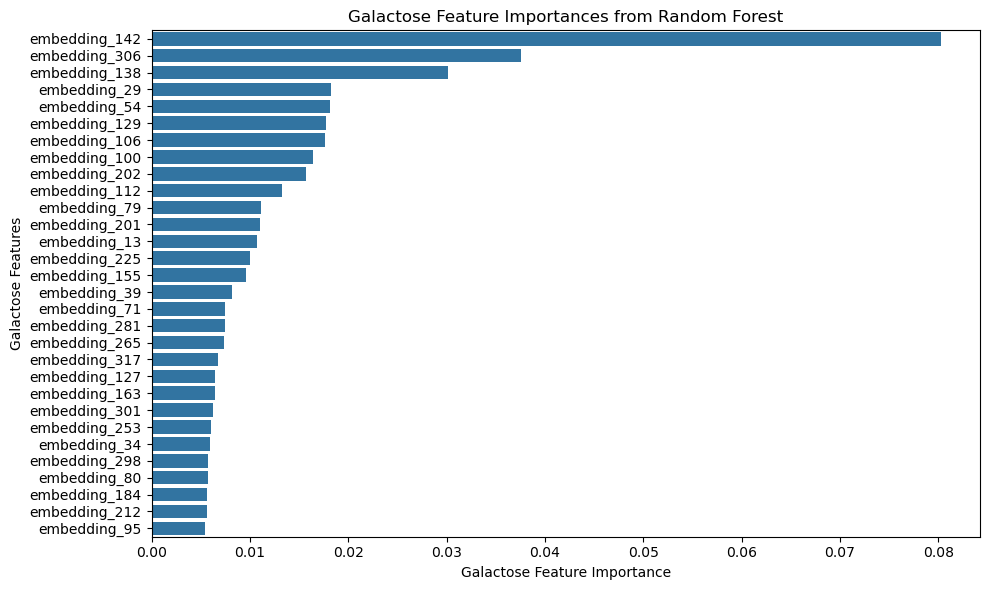

In [51]:
# feature importances for Galactose
only_embeddings_feature_importances_gal = random_forest_reg_embeddings_gal.named_steps['randomforestregressor'].feature_importances_
only_embeddings_feature_names_gal = x_only_embeddings_gal.columns
only_embeddings_sorted_indices_gal = np.argsort(only_embeddings_feature_importances_gal)[::-1]

top_k = 30

sorted_only_embeddings_feature_importances_gal = only_embeddings_feature_importances_gal[only_embeddings_sorted_indices_gal][:top_k]
sorted_only_embeddings_feature_names_gal = only_embeddings_feature_names_gal[only_embeddings_sorted_indices_gal][:top_k]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_only_embeddings_feature_importances_gal, y=sorted_only_embeddings_feature_names_gal)
plt.xlabel("Galactose Feature Importance")
plt.ylabel("Galactose Features")
plt.title("Galactose Feature Importances from Random Forest")
plt.tight_layout()
#plt.savefig("GCN4_feature_importances.png")
plt.show()

In [52]:
# Save the galactose model
joblib.dump(random_forest_reg_embeddings_gal, "./models/random_forest_model_only_embeddings_gal.pkl")

['./models/random_forest_model_only_embeddings_gal.pkl']

Part 2 Started Here!

In [53]:
!pip install metapredict

  Using cached metapredict-3.0.1-cp311-cp311-linux_x86_64.whl
  Using cached cython-3.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (30 kB)
  Using cached protfasta-0.1.15.2-py3-none-any.whl
  Using cached pytorch_lightning-2.5.1.post0-py3-none-any.whl.metadata (20 kB)
  Using cached getSequence-2.2.1-py3-none-any.whl.metadata (20 kB)
  Using cached torchmetrics-1.7.1-py3-none-any.whl.metadata (21 kB)
  Using cached lightning_utilities-0.14.3-py3-none-any.whl.metadata (5.6 kB)
Using cached getSequence-2.2.1-py3-none-any.whl (140 kB)
Using cached cython-3.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
Using cached pytorch_lightning-2.5.1.post0-py3-none-any.whl (823 kB)
Using cached lightning_utilities-0.14.3-py3-none-any.whl (28 kB)
Using cached torchmetrics-1.7.1-py3-none-any.whl (961 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follow

In [54]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import joblib
from tqdm import tqdm
import metapredict as meta
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [55]:
#Start off by importing the data

data = pd.read_csv("gcn4-orthologs.csv")
data = data.rename(columns={data.columns[0]: "tile_id"})
data.head()

,tile_id,DNAseq,ADseq,numreads_per_AD_7AGFP_AAS,Activity_7AGFP_AAS,numreads_per_AD_8AmCh_AAS,Activity_8AmCh_AAS,numreads_per_AD_9ARatio_AAS,Activity_9ARatio_AAS,numreads_per_AD_10BRatio_AAS,...,Activity_BYS4_BioRepAverage,Stdev_BYS4_BioReps,Activity_SCglucose,Start,Recovered,Activity_SCgalactose,Activity_P3promoter,Activity_P14promoter,Activity_P15promoter,Activity_P3promoterMig1TFBSremoved
0,0,AAAAATTCTAGATTTGTTTCTTTGATGCAAGGATTCTCTGATGGTT...,KNSRFVSLMQGFSDGSKDIIDNEVREVGDFSVNKPPQADD,NaN,NaN,NaN,NaN,NaN,NaN,3151.0,...,NaN,NaN,11666.48682,341,True,97250.68362,NaN,11149.49032,NaN,8040.343648
1,1,AAAAATTCTCCATCTGGTTTGGCTCATTCTTCTGTTTCTGGTGTTG...,KNSPSGLAHSSVSGVGKSRRRKGPLPPITVQDPSDKTAIK,942.0,709.606092,367.0,2921.917252,601.0,22242.74698,6909.0,...,21968.05843,5849.143385,21968.05843,146,True,15516.96245,14570.13217,16872.28649,11555.08411,10255.296840
2,2,AAACAAAATTCTCAAGTTGATCAATCTCCATTGTTGCCAGAAGAAG...,KQNSQVDQSPLLPEEELEVSEHLRRRRSGTATSPPAGGVR,NaN,NaN,NaN,NaN,NaN,NaN,6577.0,...,NaN,NaN,21203.02478,326,True,0.00000,18274.98241,15702.60901,18303.29201,17265.783330
3,3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,KQRATPLTPVVPESDDPVALKRARNTEAARRSRARKLERM,357.0,1039.469842,342.0,1089.428196,450.0,74251.36241,NaN,...,NaN,NaN,47244.41248,246,True,92844.00000,NaN,NaN,NaN,84807.518160
4,4,AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,539.0,1081.980998,627.0,622.131501,586.0,58872.95132,128.0,...,95093.69451,13292.686710,95093.69451,211,True,76399.62949,NaN,125056.17980,129302.35080,100360.735500


In [56]:
# Sort by activity_SCgalactose
activity = "Activity_SCgalactose"
low_activity_df_gal = data.sort_values(by=[activity], ascending=True)
low_activity_df_gal = low_activity_df_gal[['ADseq', activity]].dropna()
low_activity_df_gal

,ADseq,Activity_SCgalactose
8936,DPNDTVAMKRARNTLAARKSRQRKMQRFDELEDKIAKLEA,0.0
15739,SGASLFAGLQNDSPWEAPASAFTTINPHSVSGSTRTISPK,0.0
2024,TEARQNALNHRLQFDPASKLNKIQSTTIHDFSPLHTSAQP,0.0
2030,TEAARRSRARKMERMNQLEEKVEGLVGINSEIIKENSNLK,0.0
8994,DPVAVKRARNTEAARKSRARKLERQEEMERRIAELEKLLE,0.0
...,...,...
9074,DFSLGLDTTALDIAAALSQPKAKADVTPSSPMIRTTSSRA,262143.0
3439,RVSDSVSVPFGSGSTPSALFPKSLLSLPLVPRPAQATTTA,262143.0
11033,AARRSRARKMERMAQLEEKVEDLMNENSKMCDEVERLKAL,262143.0
17279,LRLSSSSRAGQPSSAAPLVNLGAISTSPLKMTFDSSNLNA,262143.0


In [57]:
# Let's look at the min and max values of the activity
low_activity_df_gal.describe()

,Activity_SCgalactose
count,19038.000000
mean,63422.829417
std,56236.541634
min,0.000000
25%,18045.696675
50%,50066.144585
75%,97417.912363
max,262143.000000


**In Silico Directed Evolution**
Without loss of generality, let's simply pick the protein sequence with the lowest activity and do some a random pointwise mutation. We then repeat this process across 
 generations. First I will add sequence features so that we can use the random forest model to predict the SCGlucose activity. The reason for this is because the model is very strict with the columns we provide for prediction. It must be named and ordered exactly the same as how we trained the model initially or scikit-learn will complain!

In [58]:
# Global constants reused for galactose
AA_LIST = 'ACDEFGHIKLMNPQRSTVWY'
AA_COLS = [f"AA_{aa}" for aa in AA_LIST]

KD_HYDROPHOBICITY = {
    'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
    'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
    'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
}

MOTIFS = [
    ("W..LF", "W..LF"),
    ("WFYL_WFYL", "[WFYL]..[WFYL][WFYL]"),
    ("WFL_WFL", "[WFL]..[WFL][WFL]"),
    ("DE_WFY", "[DE][WFY]"),
    ("DE_WF", "[DE][WF]"),
    ("DE_L", "[DE][L]"),
    ("DE_x_WFY", "[DE].[WFY]"),
    ("DE_xx_WFY", "[DE]..[WFY]"),
    ("FF", "FF"),
    ("F_F", "F.F"),
    ("F__F", "F..F"),
    ("FY_5x_FY", "[FY].....[FY]"),
    ("SP", "SP"),
    ("WFYL_3x_WFYL", "[WFYL]...[WFYL][WFYL]")
]

# Feature extraction functions
def amino_acid_count(sequence: str) -> dict[str, int]:
    c = Counter(sequence)
    return {f"AA_{aa}": c.get(aa, 0) for aa in AA_LIST}

def net_charge(seq: str) -> int:
    charge_map = {"K": 1, "R": 1, "D": -1, "E": -1}
    return sum(charge_map.get(a, 0) for a in seq)

def hydrophobicity(sequence: str) -> float:
    return sum(KD_HYDROPHOBICITY.get(aa, 0) for aa in sequence)

def motif_counts_dict(seq: str) -> dict[str, int]:
    return {name: len(re.findall(pat, seq)) for name, pat in MOTIFS}

# Galactose-specific application
def add_sequence_features_gal(df_gal: pd.DataFrame, seq_col: str = "ADseq") -> pd.DataFrame:
    df_gal = df_gal.copy()

    # Basic features
    aa_expanded = df_gal[seq_col].apply(amino_acid_count).apply(pd.Series)
    motif_expanded = df_gal[seq_col].apply(motif_counts_dict).apply(pd.Series)

    df_gal["NetCharge"] = df_gal[seq_col].apply(net_charge)
    df_gal["Hydrophobicity"] = df_gal[seq_col].apply(hydrophobicity)
    df_gal["Length"] = df_gal[seq_col].str.len()

    # Combine into one dataframe
    result_df_gal = pd.concat([df_gal, aa_expanded, motif_expanded], axis=1)
    return result_df_gal

In [59]:
low_activity_df_gal = add_sequence_features_gal(low_activity_df_gal, seq_col="ADseq")

# now we put Activity_SCglucose as the last column for convenience
low_activity_df_gal = low_activity_df_gal[[col for col in low_activity_df_gal.columns if col != activity] + [activity]]
low_activity_df_gal.head()

,ADseq,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,AA_G,...,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL,Activity_SCgalactose
8936,DPNDTVAMKRARNTLAARKSRQRKMQRFDELEDKIAKLEA,4,-51.3,40,6,0,4,3,1,0,...,1,0,0,0,0,0,0,0,0,0.0
15739,SGASLFAGLQNDSPWEAPASAFTTINPHSVSGSTRTISPK,0,-11.4,40,5,0,1,1,2,3,...,0,0,1,0,0,0,0,2,0,0.0
2024,TEARQNALNHRLQFDPASKLNKIQSTTIHDFSPLHTSAQP,1,-35.2,40,4,0,2,1,2,0,...,0,0,0,0,0,0,0,1,0,0.0
2030,TEAARRSRARKMERMNQLEEKVEGLVGINSEIIKENSNLK,2,-41.5,40,3,0,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0.0
8994,DPVAVKRARNTEAARKSRARKLERQEEMERRIAELEKLLE,3,-52.4,40,6,0,1,8,0,0,...,1,0,0,0,0,0,0,0,0,0.0


Great! Now what we're going to do is simply take the first row which corresponds to the ADseq with low SCglucose activity. We will also take note of its corresponding activity value for comparison later on!

In [60]:
protein_sequence_gal = low_activity_df_gal.iloc[0, 0]
activity_value_gal = low_activity_df_gal.iloc[0, -1]
print(f"Protein sequence for Galactose: {protein_sequence_gal}")
print(f"Activity value for Galactose: {activity_value_gal}")

Protein sequence for Galactose: DPNDTVAMKRARNTLAARKSRQRKMQRFDELEDKIAKLEA
Activity value for Galactose: 0.0


In [61]:
def simulate_mutations_over_generations_gal(
    initial_sequence_gal: str,
    aa_list: list[str],
    add_features_fn_gal,
    num_generations: int = 10,
    num_mutations_per_generation: int = 1_000,
    max_sequences_per_gen: int = 5_000,
):
    # Precompute the original disorder once
    original_disorder_gal = np.array(meta.predict_disorder(initial_sequence_gal))

    current_sequences_gal = [initial_sequence_gal]
    all_dfs_gal = []

    # Begin generation loop
    for gen in tqdm(range(num_generations), desc="Generation"):
        parent_count_gal = len(current_sequences_gal)
        total_events_gal = num_mutations_per_generation

        # Randomly select parents, positions, and new amino acids
        parents_gal   = np.random.randint(0, parent_count_gal, size=total_events_gal)
        positions_gal = np.random.randint(0, len(initial_sequence_gal), size=total_events_gal)
        new_aas_gal   = np.random.choice(aa_list, size=total_events_gal)

        # Generate mutated sequences (unique only)
        mutated_gal = {
            current_sequences_gal[p][:pos] + aa + current_sequences_gal[p][pos+1:]
            for p, pos, aa in zip(parents_gal, positions_gal, new_aas_gal)
        }

        mutated_list_gal = list(mutated_gal)
        tqdm.write(f"Gen {gen+1}: {len(mutated_list_gal)} unique mutants created")

        # Optional: filter based on similarity to original disorder
        if len(mutated_list_gal) > max_sequences_per_gen:
            distances_gal = []
            for seq in tqdm(mutated_list_gal, desc="Disorder scoring"):
                sc_gal = np.array(meta.predict_disorder(seq))
                distances_gal.append(np.linalg.norm(sc_gal - original_disorder_gal))
            distances_gal = np.array(distances_gal)

            keep_idx_gal = np.argsort(distances_gal)[:max_sequences_per_gen]
            mutated_list_gal = [mutated_list_gal[i] for i in keep_idx_gal]
            tqdm.write(f"  → filtered down to {len(mutated_list_gal)} by disorder")

        # Add features
        df_gal = pd.DataFrame({"ADseq": mutated_list_gal})
        df_gal["Generation"] = gen + 1
        df_gal = add_features_fn_gal(df_gal, seq_col="ADseq")

        # Save for this generation
        all_dfs_gal.append(df_gal)
        current_sequences_gal = mutated_list_gal

    return pd.concat(all_dfs_gal, ignore_index=True)

In [62]:
result_gal = simulate_mutations_over_generations_gal(
    initial_sequence_gal=protein_sequence_gal, 
    aa_list=list(AA_LIST), 
    add_features_fn_gal=add_sequence_features_gal,  # make sure this is defined for galactose
    num_generations=5, 
    num_mutations_per_generation=5000
)

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Gen 1: 759 unique mutants created


Generation:  20%|██        | 1/5 [00:00<00:00,  4.13it/s]

Gen 2: 4887 unique mutants created


Generation:  40%|████      | 2/5 [00:01<00:02,  1.07it/s]

Gen 3: 4988 unique mutants created


Generation:  60%|██████    | 3/5 [00:03<00:02,  1.29s/it]

Gen 4: 4989 unique mutants created


Generation:  80%|████████  | 4/5 [00:05<00:01,  1.46s/it]

Gen 5: 4991 unique mutants created


Generation: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


In [63]:
result_gal.head()

,ADseq,Generation,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,...,DE_WF,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL
0,DPNDTVAMKRARFTLAARKSRQRKMQRFDELEDKIAKLEA,1,4,-45.0,40,6,0,4,3,2,...,0,1,0,0,0,0,0,0,0,0
1,DPNDTVAMKRARNTLAAPKSRQRKMQRFDELEDKIAKLEA,1,3,-48.4,40,6,0,4,3,1,...,0,1,0,0,0,0,0,0,0,0
2,DPNDTVAMKRARNTLAARKSRQRKMYRFDELEDKIAKLEA,1,4,-49.1,40,6,0,4,3,1,...,0,1,0,0,0,0,0,0,0,0
3,DPNDTVAMKRARNTLAARKSRQRKMQRFDELFDKIAKLEA,1,5,-45.0,40,6,0,4,2,2,...,0,1,1,1,0,0,0,0,0,0
4,DPNDTVAMKRARNTLAARKSRQRKMQRFDELEDKIAKVEA,1,4,-50.9,40,6,0,4,3,1,...,0,1,0,0,0,0,0,0,0,0


In [64]:
# ==========================
# ESM2 Feature Embedding Computation
# ==========================

# Load the .env file
load_dotenv()
hf_token = os.getenv("HF_TOKEN")

# Load model and tokenizer once
model_id = "facebook/esm2_t6_8M_UR50D"
tokenizer = AutoTokenizer.from_pretrained(model_id, token=hf_token)
model = AutoModel.from_pretrained(model_id, token=hf_token)
model.eval()

def generate_embedding(sequence):
    """Generate pooled ESM embedding for a protein sequence."""
    input_ids = tokenizer(sequence, return_tensors="pt").input_ids
    attention_mask = torch.ones_like(input_ids)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        sequence_embeddings = outputs.last_hidden_state.squeeze()

    # Remove special tokens [CLS], [EOS]
    sequence_embeddings = sequence_embeddings[1:-1]

    # Mean-pool across residues
    pooled_embedding = sequence_embeddings.mean(dim=0)  # shape: (hidden_size,)
    return pooled_embedding.cpu().numpy()

def save_embeddings_to_npz(data, sequence_column, save_path):
    """Generate embeddings for all sequences and save into a single NPZ file."""
    all_embeddings = []

    for sequence in tqdm(data[sequence_column], desc="Generating embeddings"):
        embedding = generate_embedding(sequence)
        all_embeddings.append(embedding)

    all_embeddings = np.stack(all_embeddings)  # Shape: (num_sequences, hidden_dim)

    np.savez_compressed(save_path, embeddings=all_embeddings)
    print(f"Saved {len(all_embeddings)} embeddings to {save_path}")

    return all_embeddings

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [65]:
result_gal.head()

,ADseq,Generation,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,...,DE_WF,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL
0,DPNDTVAMKRARFTLAARKSRQRKMQRFDELEDKIAKLEA,1,4,-45.0,40,6,0,4,3,2,...,0,1,0,0,0,0,0,0,0,0
1,DPNDTVAMKRARNTLAAPKSRQRKMQRFDELEDKIAKLEA,1,3,-48.4,40,6,0,4,3,1,...,0,1,0,0,0,0,0,0,0,0
2,DPNDTVAMKRARNTLAARKSRQRKMYRFDELEDKIAKLEA,1,4,-49.1,40,6,0,4,3,1,...,0,1,0,0,0,0,0,0,0,0
3,DPNDTVAMKRARNTLAARKSRQRKMQRFDELFDKIAKLEA,1,5,-45.0,40,6,0,4,2,2,...,0,1,1,1,0,0,0,0,0,0
4,DPNDTVAMKRARNTLAARKSRQRKMQRFDELEDKIAKVEA,1,4,-50.9,40,6,0,4,3,1,...,0,1,0,0,0,0,0,0,0,0


In [66]:
model_name = "./models/esm_random_forest_model_gal.pkl"

# Load the regression model
reg_model = joblib.load(model_name)

if model_name.split("/")[-1].split("_")[0] == "esm":
    mutated_seq_embeddings = save_embeddings_to_npz(result_gal, "ADseq", "./feature-embeddings/mutated_seq_embeddings.npz")
    embeddings_df = pd.DataFrame(mutated_seq_embeddings)
    embeddings_df.columns = [f"embedding_{i}" for i in range(embeddings_df.shape[1])]
    mutated_feature =result_gal.drop(columns=["ADseq", "Generation"])   
    mutated_feature = pd.concat([mutated_feature, embeddings_df], axis=1)
    
else: 
    mutated_feature = result_gal.drop(columns=["ADseq", "Generation"])

# Make predictions on the mutated sequence
predictions = reg_model.predict(mutated_feature)

# Add predictions to the DataFrame
result_gal[activity] = predictions

result_gal.head()

Generating embeddings: 100%|██████████| 20614/20614 [04:55<00:00, 69.73it/s]


Saved 20614 embeddings to ./feature-embeddings/mutated_seq_embeddings.npz


,ADseq,Generation,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,...,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL,Activity_SCgalactose
0,DPNDTVAMKRARFTLAARKSRQRKMQRFDELEDKIAKLEA,1,4,-45.0,40,6,0,4,3,2,...,1,0,0,0,0,0,0,0,0,52610.060119
1,DPNDTVAMKRARNTLAAPKSRQRKMQRFDELEDKIAKLEA,1,3,-48.4,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,46399.117936
2,DPNDTVAMKRARNTLAARKSRQRKMYRFDELEDKIAKLEA,1,4,-49.1,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,54009.669838
3,DPNDTVAMKRARNTLAARKSRQRKMQRFDELFDKIAKLEA,1,5,-45.0,40,6,0,4,2,2,...,1,1,1,0,0,0,0,0,0,60323.380041
4,DPNDTVAMKRARNTLAARKSRQRKMQRFDELEDKIAKVEA,1,4,-50.9,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,38839.034403


In [67]:
#ADD CELLS AS NEEDED, MAKE SURE TO DOCUMENT YOUR CODE WITH COMMENTS

Naturally the next thing to do is to find which of these mutations is predicted to have the highest scglucose_activity. We'll then perform a more thorough analysis on this sequence

In [68]:
highest_activity_candidates = result_gal.sort_values(by=[activity], ascending=False)
highest_activity_candidates

,ADseq,Generation,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,...,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL,Activity_SCgalactose
1789,DDNDTVAMKRRRNTLAARKSRQRKMQRFDELEDKIAKLEA,2,4,-59.5,40,5,0,5,3,1,...,1,0,0,0,0,0,0,0,0,148087.812501
8773,DDNDTVPMKRARNTLAARKSRQRKMQRFDMLEDKIAKLEA,3,4,-51.2,40,5,0,5,2,1,...,0,0,0,0,0,0,0,0,0,146938.869150
18562,HPNDTNACKRARNTLAARKRRQRKMQRFDKLEDKIAKLEA,5,8,-62.2,40,6,1,3,2,1,...,0,0,0,0,0,0,0,0,0,143290.564320
15724,DPNDTVAMKRCRNTLAARDSRQRKMQRHDELEDKIHVLEA,5,1,-53.1,40,4,1,5,3,0,...,1,0,0,0,0,0,0,0,0,143208.074726
9670,HPNDTVACKRARNTLAARKRRQRKMQRFDELEDKIAKLEA,3,6,-54.1,40,6,1,3,3,1,...,1,0,0,0,0,0,0,0,0,141081.418465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,DPNDTVAMKRARNTLAARKSRQEKMQRFDEEEDKIAKLSS,4,2,-57.5,40,5,0,4,4,1,...,0,0,0,0,0,0,0,0,0,26145.613404
6832,DPNDTVAMKLARNTEAARKSRQRKMQRFDELEDKIAKLET,3,2,-52.8,40,5,0,4,4,1,...,1,0,0,0,0,0,0,0,0,25946.568984
10703,DPNDTVAMKRARTGLAARKSRERKMQRFNELEDKIAKLEA,4,4,-48.2,40,6,0,3,4,1,...,1,0,0,0,0,0,0,0,0,25887.305772
13086,DPNDTVAMERARNTLAARKSRQRKMQRFDELERKIAKLED,4,3,-57.2,40,5,0,4,4,1,...,1,0,0,0,0,0,0,0,0,25088.624030


Now let's take the top 500 rows and then further filter for the top 100 based off disorder score

In [69]:
top_500 = highest_activity_candidates.head(500)
top_500.head()

,ADseq,Generation,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,...,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL,Activity_SCgalactose
1789,DDNDTVAMKRRRNTLAARKSRQRKMQRFDELEDKIAKLEA,2,4,-59.5,40,5,0,5,3,1,...,1,0,0,0,0,0,0,0,0,148087.812501
8773,DDNDTVPMKRARNTLAARKSRQRKMQRFDMLEDKIAKLEA,3,4,-51.2,40,5,0,5,2,1,...,0,0,0,0,0,0,0,0,0,146938.869150
18562,HPNDTNACKRARNTLAARKRRQRKMQRFDKLEDKIAKLEA,5,8,-62.2,40,6,1,3,2,1,...,0,0,0,0,0,0,0,0,0,143290.564320
15724,DPNDTVAMKRCRNTLAARDSRQRKMQRHDELEDKIHVLEA,5,1,-53.1,40,4,1,5,3,0,...,1,0,0,0,0,0,0,0,0,143208.074726
9670,HPNDTVACKRARNTLAARKRRQRKMQRFDELEDKIAKLEA,3,6,-54.1,40,6,1,3,3,1,...,1,0,0,0,0,0,0,0,0,141081.418465


Now using vector norms, I want to sort by disorderedness

In [70]:
orig_seq_disorder = np.array(meta.predict_disorder(protein_sequence_gal))
top_500_disorder = np.array([meta.predict_disorder(seq) for seq in top_500["ADseq"]])
top_500_disorder = np.array(top_500_disorder)


# now sort by the disorder
sorted_disorder = np.argsort(np.linalg.norm(top_500_disorder - orig_seq_disorder, axis=1))
sorted_disorder = top_500.iloc[sorted_disorder]
sorted_disorder = sorted_disorder.reset_index(drop=True)
sorted_disorder.head(10)

,ADseq,Generation,NetCharge,Hydrophobicity,Length,AA_A,AA_C,AA_D,AA_E,AA_F,...,DE_L,DE_x_WFY,DE_xx_WFY,FF,F_F,F__F,FY_5x_FY,SP,WFYL_3x_WFYL,Activity_SCgalactose
0,DPNDTVAMKRARNQLAARKRRQRKMQRFDELEDKIAKLEA,2,5,-57.8,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,126335.360383
1,DPHDTVAMKRARNTLAARKRRQRKMQRFDELEDKIAKLEA,2,5,-54.7,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,112966.229096
2,DPNDTVAMKRARNTLAARKKRQRKMQRFDELEDKIAKLEA,2,5,-54.4,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,114172.043569
3,DPNDTVAMKRARNTLAARKKRQRKMQRFDELEDKIAKLEA,1,5,-54.4,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,114172.043569
4,HPNDTVAMKRARNTLAARKRRQRKMQRFDELEDKIAKLEA,2,6,-54.7,40,6,0,3,3,1,...,1,0,0,0,0,0,0,0,0,133077.556170
5,DPNDTVAMKRARNTLAARKRRQRKMQRFDELEDKIAKLEA,1,5,-55.0,40,6,0,4,3,1,...,1,0,0,0,0,0,0,0,0,130815.792221
6,DDNDTVAMKRARNTLAARKKRQRKMQRFDELEDKYAKLEA,3,4,-62.1,40,6,0,5,3,1,...,1,1,1,0,0,0,0,0,0,123188.790717
7,EPNDTVAMKRARNTLAARKKRQRKMQRFDELEDKWAKLEA,3,5,-59.8,40,6,0,3,4,1,...,1,1,1,0,0,0,0,0,0,100869.084328
8,DPNKTVAMKRARNSLAARKSRQRKMARFDELEDKIAKLEA,3,6,-46.5,40,7,0,3,3,1,...,1,0,0,0,0,0,0,0,0,111453.756837
9,DPNDTVAMKRARNTLAARNSRQRKMQRFDELEDKIAFLEA,3,2,-44.2,40,6,0,4,3,2,...,1,0,0,0,0,0,0,0,0,102263.989783


***Cross-Examination Between Original and Mutated Sequences***

In [71]:
top_candidate = sorted_disorder.iloc[0]
print(f"Top candidate sequence: {top_candidate['ADseq']}")
print(f"Original sequence: {protein_sequence_gal}")
print(f"Original activity: {activity_value_gal}")
print(f"Predicted activity: {top_candidate[activity]}")

Top candidate sequence: DPNDTVAMKRARNQLAARKRRQRKMQRFDELEDKIAKLEA
Original sequence: DPNDTVAMKRARNTLAARKSRQRKMQRFDELEDKIAKLEA
Original activity: 0.0
Predicted activity: 126335.36038289992


In [73]:
# How these two are different
def compare_sequences(seq1: str, seq2: str) -> list[tuple[int, str, str]]:
    differences = []
    for i, (a, b) in enumerate(zip(seq1, seq2)):
        if a != b:
            differences.append((i, a, b))
    return differences
differences = compare_sequences(protein_sequence_gal, top_candidate["ADseq"])
print("Differences between original and top candidate:")
for pos, original_aa, new_aa in differences:
    print(f"Position {pos}: {original_aa} -> {new_aa}")

Differences between original and top candidate:
Position 13: T -> Q
Position 19: S -> R


In [76]:
# Difference in net charge and hydrophobicity
original_net_charge = net_charge(protein_sequence_gal)
top_candidate_net_charge = net_charge(top_candidate["ADseq"])
print(f"Original net charge: {original_net_charge}")
print(f"Top candidate net charge: {top_candidate_net_charge}")
print(f"Net charge difference: {top_candidate_net_charge - original_net_charge}")


original_hydrophobicity = hydrophobicity(protein_sequence_gal)
top_candidate_hydrophobicity = hydrophobicity(top_candidate["ADseq"])
print(f"Original hydrophobicity: {original_hydrophobicity}")
print(f"Top candidate hydrophobicity: {top_candidate_hydrophobicity}")
print(f"Hydrophobicity difference: {top_candidate_hydrophobicity - original_hydrophobicity}")

Original net charge: 4
Top candidate net charge: 5
Net charge difference: 1
Original hydrophobicity: -51.30000000000001
Top candidate hydrophobicity: -57.80000000000001
Hydrophobicity difference: -6.5


***Disorder Analysis with Meta Predict***

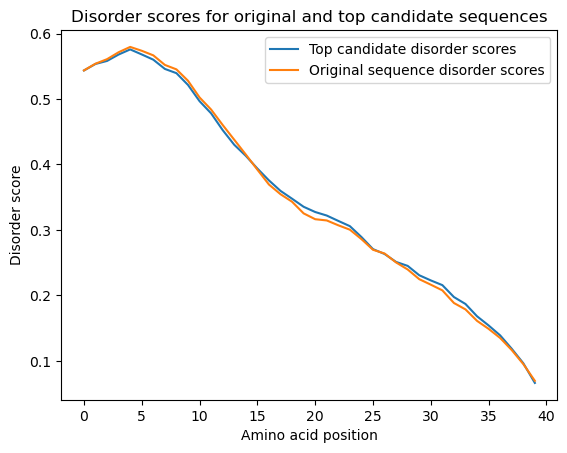

In [78]:
top_candidate_disorder_scores = meta.predict_disorder(top_candidate["ADseq"])
original_sequence_disorder_scores = meta.predict_disorder(protein_sequence_gal)

plt.plot(top_candidate_disorder_scores, label="Top candidate disorder scores")
plt.plot(original_sequence_disorder_scores, label="Original sequence disorder scores")
plt.xlabel("Amino acid position")
plt.ylabel("Disorder score")
plt.title("Disorder scores for original and top candidate sequences")
plt.legend()
plt.show()

In [80]:
# Save the top 500 sequences to a CSV file
top_500 = sorted_disorder.head(500)
top_500.to_csv(f"top_500_sequences_{activity}.csv", index=False)